In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# EDA de dataset API
Filtrado de datos duplicados

In [ ]:
df_api = pd.read_csv("tramites_lapaz_api_identificador.csv",dtype={"codigo_catastral": str})
print(df_api.shape)
df_api.info()

(13907, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13907 entries, 0 to 13906
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_pc_tramite                     13907 non-null  int64  
 1   descripcion                       13907 non-null  object 
 2   id_tipo_tramite                   13907 non-null  int64  
 3   fecha_registro                    13865 non-null  object 
 4   solicitante                       13907 non-null  object 
 5   arquitecto_nombre                 13907 non-null  object 
 6   arquitecto_registro_nacional_cab  13907 non-null  int64  
 7   nro_inmueble                      13905 non-null  object 
 8   id_proyecto_desarrollo            10540 non-null  float64
 9   id_tipo_obra                      10540 non-null  float64
 10  tipo_proyecto                     10540 non-null  object 
 11  tipo_obra                         10540 non-null  objec

In [ ]:
# Agrupar por codigo_catastral y contar repeticiones
conteo = (
    df_api.groupby("codigo_catastral")
      .size()
      .reset_index(name="repeticiones")
)

# Filtrar solo los que se repiten más de una vez
repetidos = (
    conteo[conteo["repeticiones"] > 1]
    .sort_values("repeticiones", ascending=False)
    .reset_index(drop=True)
)


print(repetidos.size)
# Mostrar
print(repetidos.head(20))


7020
   codigo_catastral  repeticiones
0   023001700280000            22
1   031009300410000            17
2   001011000320000            15
3   038006200020000            15
4   014004400010000            15
5   020098600100000            14
6   001011200140000            14
7   004002200200000            14
8   014004800010000            14
9   028005800100000            13
10  029009000010000            13
11  020050800400000            13
12  044022600120000            13
13  044256900160000            13
14  006120200190000            13
15  001021900050000            12
16  026004400100000            12
17  017006900420000            12
18  044111900010000            12
19  022001500150000            12


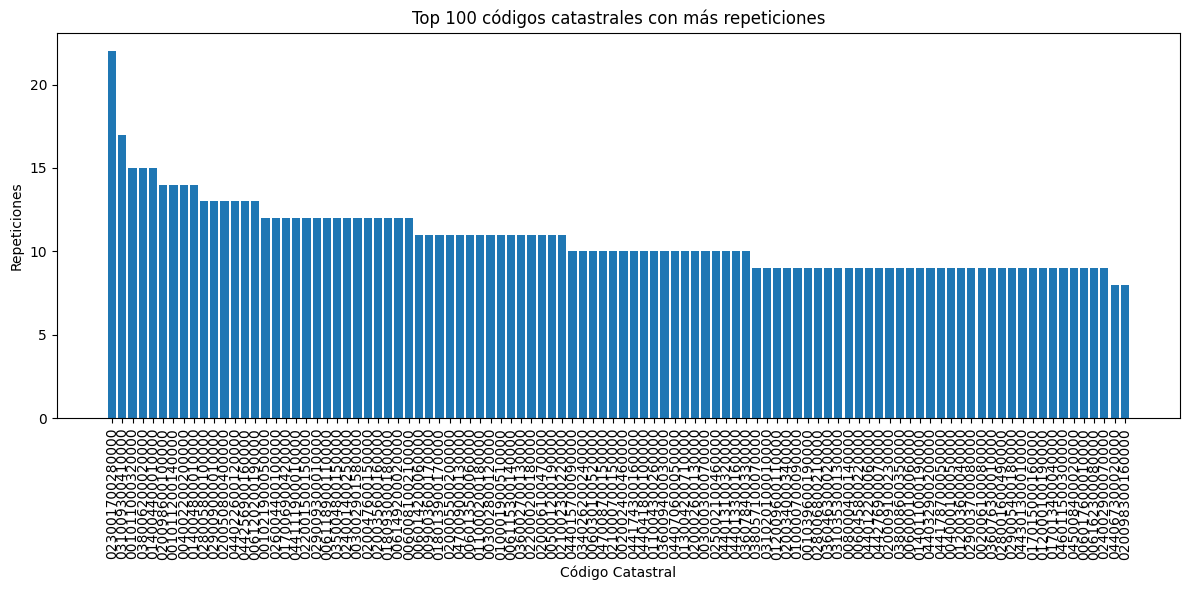

In [ ]:
# Ordenar para graficar los más repetidos
top_n = 100  # numero de columnas a mostrar
df_plot = repetidos.head(top_n)

plt.figure(figsize=(12,6))
plt.bar(df_plot["codigo_catastral"].astype(str), df_plot["repeticiones"])
plt.xticks(rotation=90)
plt.title(f"Top {top_n} códigos catastrales con más repeticiones")
plt.xlabel("Código Catastral")
plt.ylabel("Repeticiones")
plt.tight_layout()
plt.show()


In [ ]:
df_api.describe()

id_pc_tramite  id_tipo_tramite  arquitecto_registro_nacional_cab  \
count   13907.000000     13907.000000                      1.390700e+04   
mean    14298.802905         3.663191                      8.289599e+03   
std     11761.322820         4.712124                      2.954889e+04   
min         1.000000         1.000000                      1.410000e+02   
25%      3704.500000         1.000000                      4.443000e+03   
50%     10416.000000         1.000000                      7.328000e+03   
75%     25073.000000         1.000000                      1.124000e+04   
max     36576.000000        12.000000                      3.450497e+06   

       id_proyecto_desarrollo  id_tipo_obra  numero_tramite  id_ins_documento  \
count            10540.000000  10540.000000    13907.000000       1735.000000   
mean                 8.195920      1.958254    33822.963975     197688.659942   
std                  0.887891      0.200017    19865.132454      77655.768953   
min                  1.000000      1.000000        1.000000      85617.000000   
25%                  8.000000      2.000000    22674.500000     119385.500000   
50%                  8.000000      2.000000    33080.000000     200648.000000   
75%                  9.000000      2.000000    50546.000000     268732.500000   
max                 12.000000      2.000000    72101.000000     330555.000000   

       distrito_municipal  cantidad_pisos  superficie_legal  \
count        13907.000000    13906.000000      13166.000000   
mean            11.632487        4.408169        320.038250   
std              6.181182       12.788010       1317.770406   
min              1.000000        0.000000          0.000000   
25%              6.000000        3.000000        160.000000   
50%             12.000000        4.000000        215.000000   
75%             18.000000        5.000000        306.000000   
max             21.000000     1476.000000      60000.000000   

       superficie_construida      latitude     longitude  anio_registro  
count            3675.000000  13883.000000  13883.000000   13865.000000  
mean             1117.526389    -16.504796    -68.116212    2021.324270  
std              2166.678274      0.022058      0.030329       2.360934  
min                 1.000000    -16.597460    -68.170706    2017.000000  
25%               374.805000    -16.518624    -68.141072    2019.000000  
50%               565.510000    -16.501806    -68.120834    2021.000000  
75%               960.155000    -16.489944    -68.098295    2023.000000  
max             51714.600000    -16.440893    -68.031340    2025.000000

<Axes: >

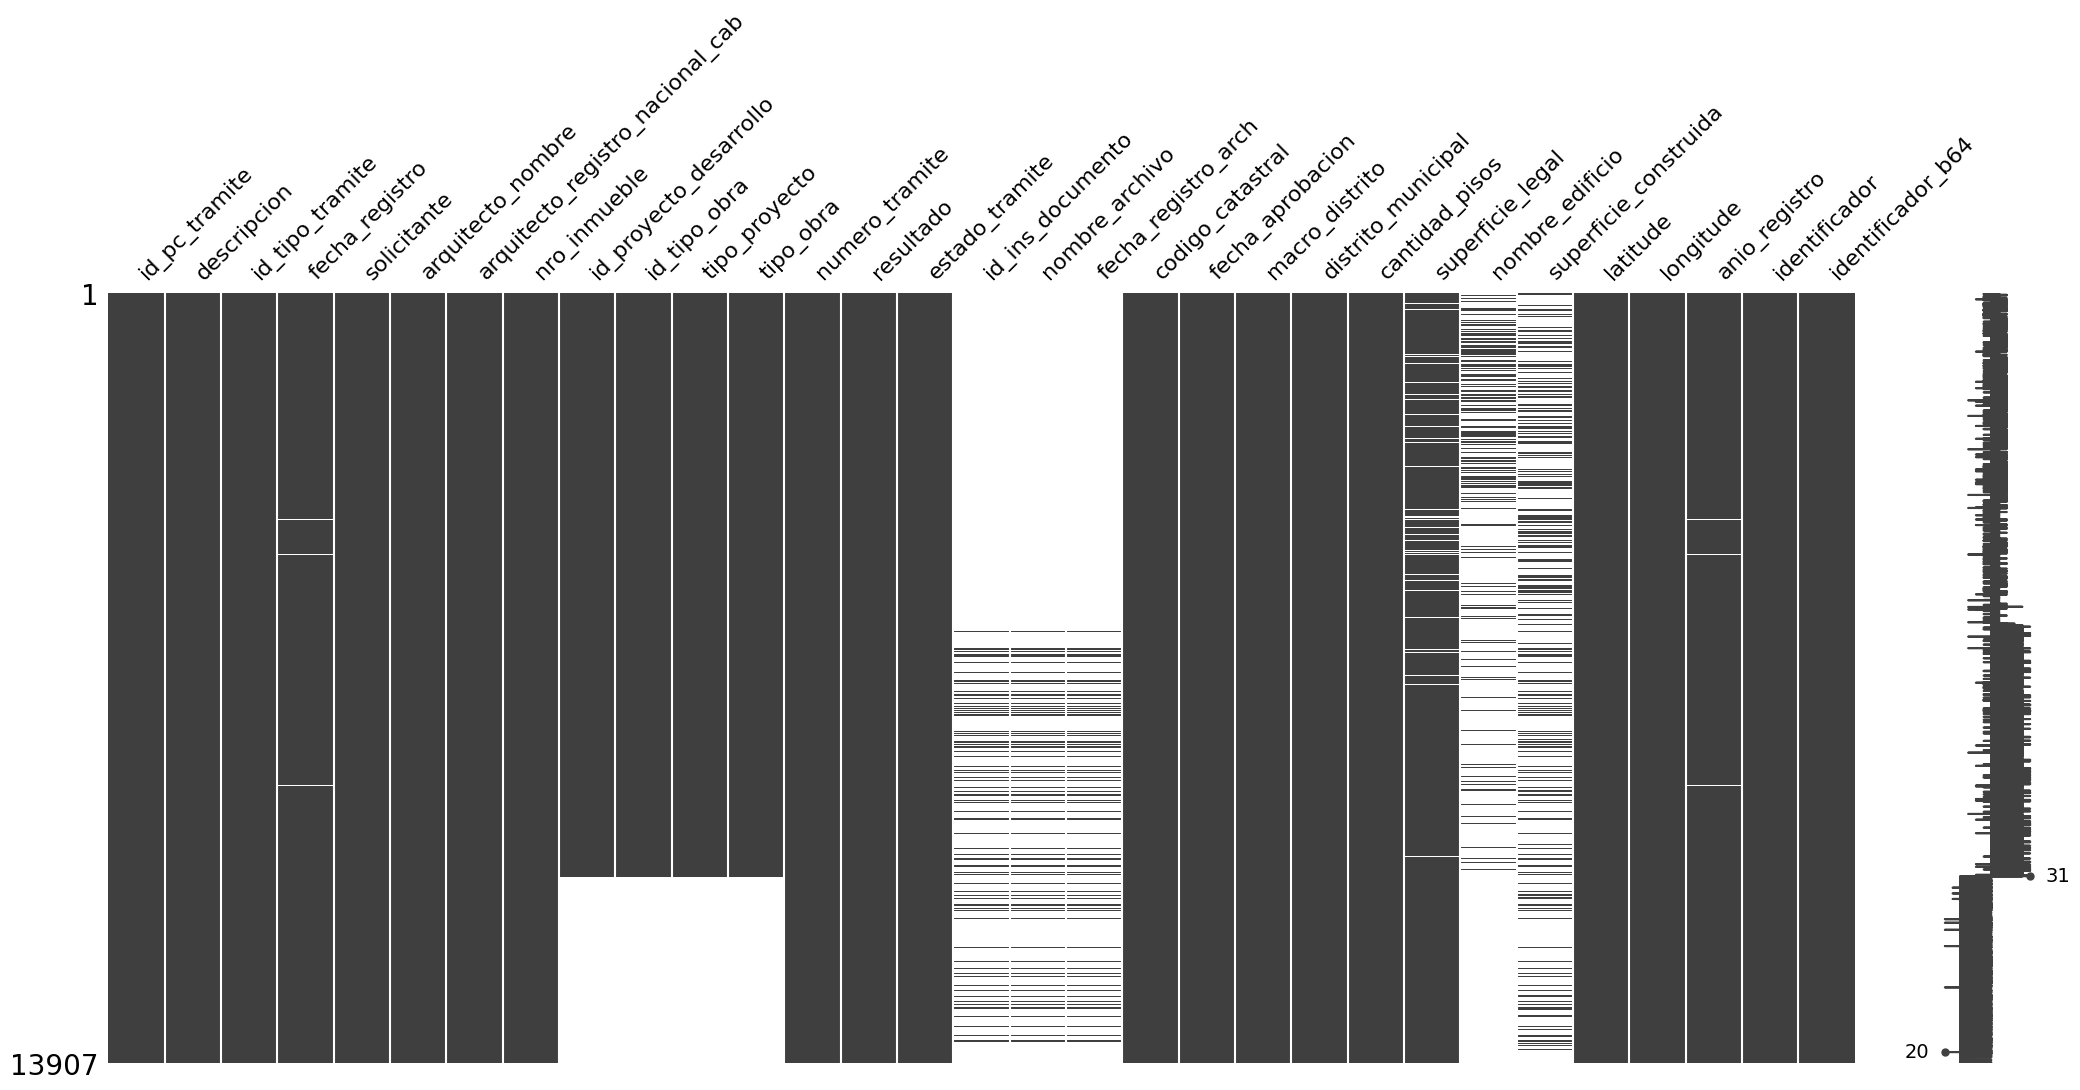

In [ ]:
# matriz de nulos
msno.matrix(df_api)

<Axes: >

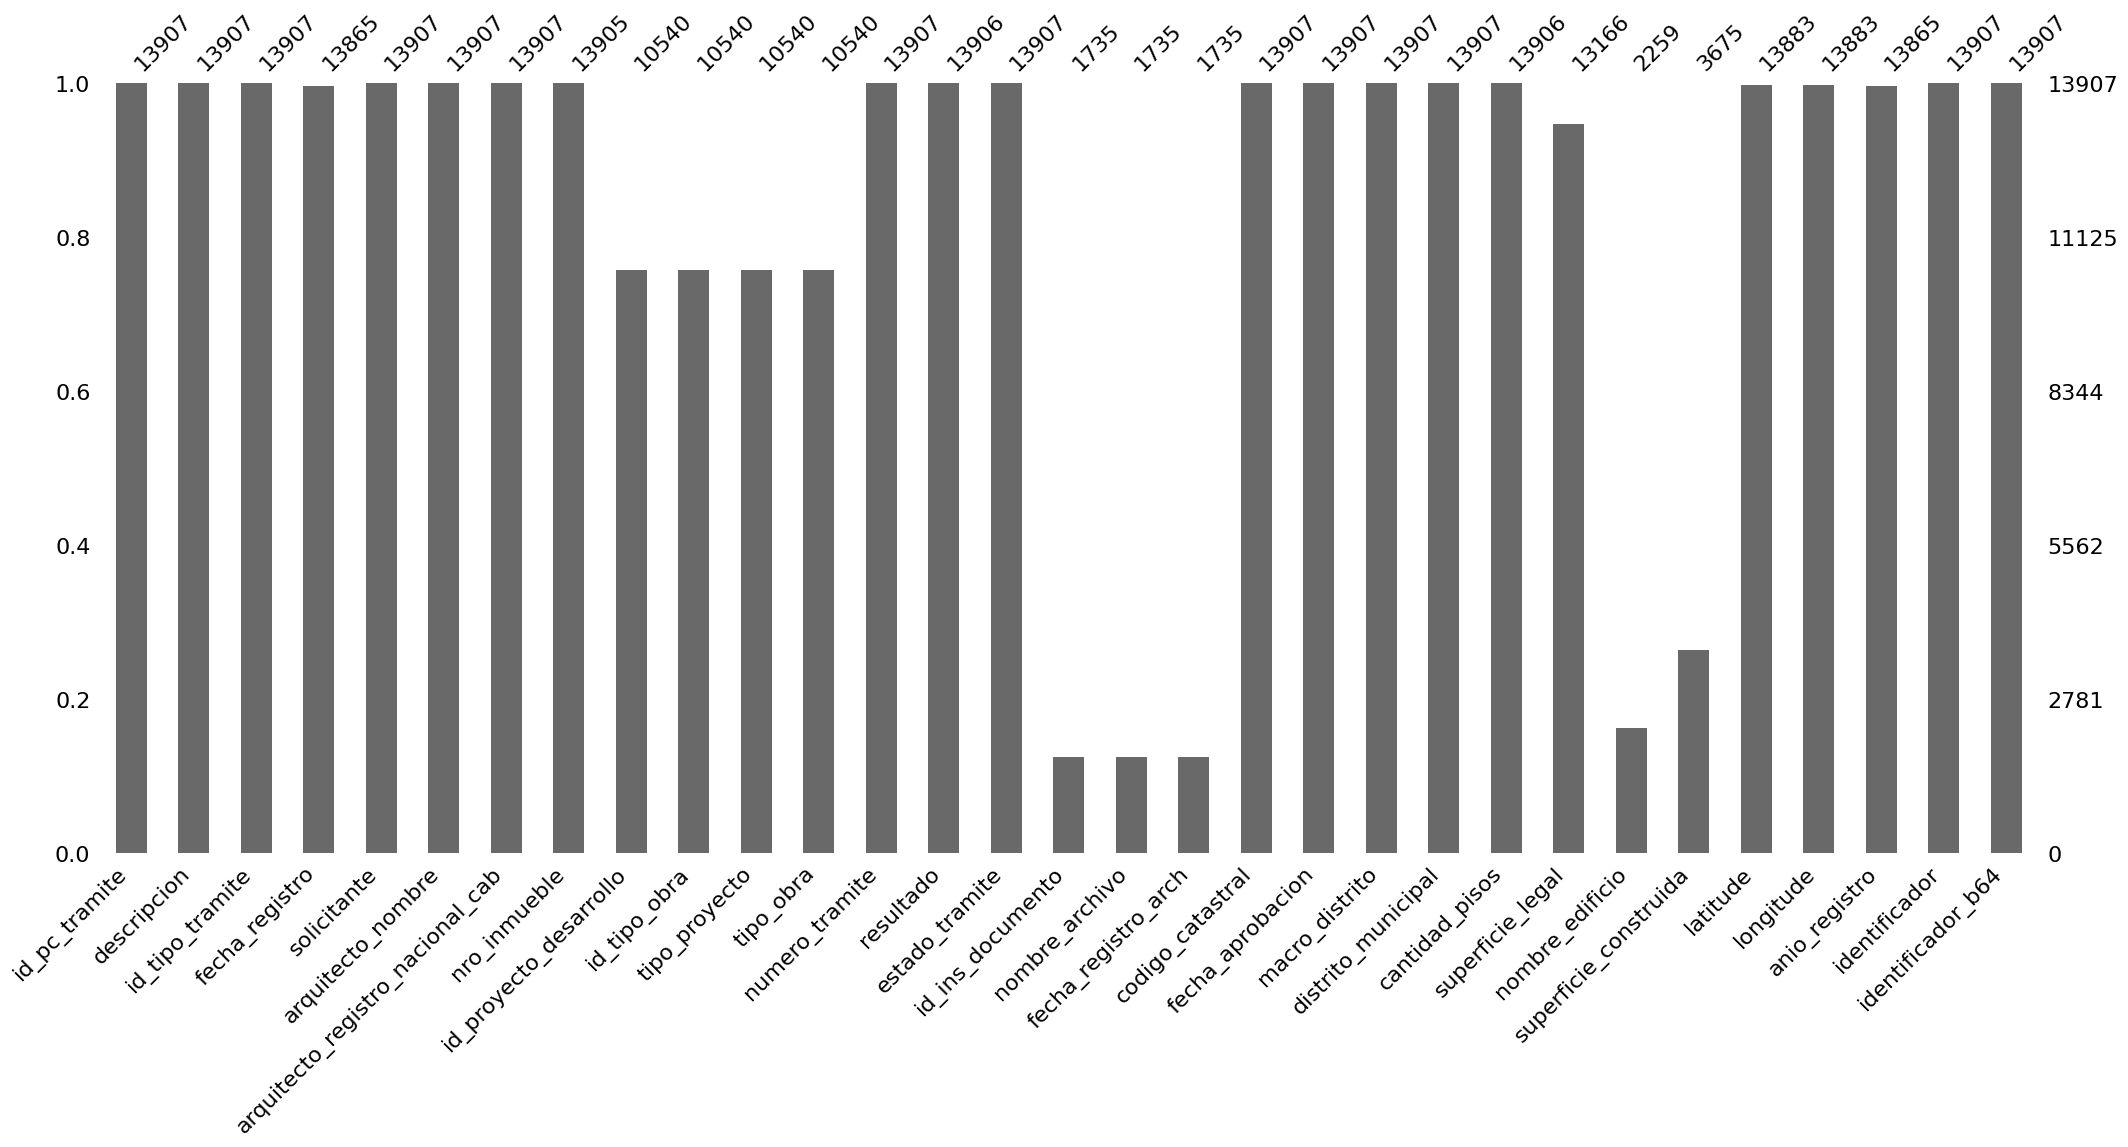

In [ ]:
msno.bar(df_api)

In [ ]:
# Conteo de duplicados por cada columna individual
for col in df_api.columns:
    n_dup = df_api.duplicated(subset=[col]).sum()
    print(f"{col}: {n_dup} duplicados")


id_pc_tramite: 2 duplicados
descripcion: 13904 duplicados
id_tipo_tramite: 13905 duplicados
fecha_registro: 43 duplicados
solicitante: 9102 duplicados
arquitecto_nombre: 12631 duplicados
arquitecto_registro_nacional_cab: 12650 duplicados
nro_inmueble: 9291 duplicados
id_proyecto_desarrollo: 13894 duplicados
id_tipo_obra: 13904 duplicados
tipo_proyecto: 13894 duplicados
tipo_obra: 13904 duplicados
numero_tramite: 2 duplicados
resultado: 13903 duplicados
estado_tramite: 13904 duplicados
id_ins_documento: 12171 duplicados
nombre_archivo: 12171 duplicados
fecha_registro_arch: 12171 duplicados
codigo_catastral: 9264 duplicados
fecha_aprobacion: 2922 duplicados
macro_distrito: 13899 duplicados
distrito_municipal: 13886 duplicados
cantidad_pisos: 13873 duplicados
superficie_legal: 11619 duplicados
nombre_edificio: 12432 duplicados
superficie_construida: 10462 duplicados
latitude: 8780 duplicados
longitude: 8776 duplicados
anio_registro: 13897 duplicados
identificador: 2 duplicados
identificad

In [ ]:
# Filas duplicadas solo en 'codigo_catastral'
df_duplicados_cc = df_api[df_api.duplicated(subset=["codigo_catastral"], keep=False)]
display(df_duplicados_cc.sort_values("codigo_catastral").head(10))


id_pc_tramite              descripcion  id_tipo_tramite  \
420             462  PERMISO DE CONSTRUCCION                1   
320             357  PERMISO DE CONSTRUCCION                1   
78               92  PERMISO DE CONSTRUCCION                1   
3021           3227  PERMISO DE CONSTRUCCION                1   
2780           2962  PERMISO DE CONSTRUCCION                1   
3101           3308  PERMISO DE CONSTRUCCION                1   
803             871  PERMISO DE CONSTRUCCION                1   
4057           4321  PERMISO DE CONSTRUCCION                1   
4219           4508  PERMISO DE CONSTRUCCION                1   
4161           4434  PERMISO DE CONSTRUCCION                1   

                        fecha_registro                      solicitante  \
420   2018-02-28 16:01:41.747000+00:00  SILVERIO ARMANDO ACARAPI FLORES   
320   2018-02-06 15:59:18.487000+00:00  SILVERIO ARMANDO ACARAPI FLORES   
78    2017-12-07 19:46:27.823000+00:00  SILVERIO ARMANDO ACARAPI FLORES   
3021  2019-05-20 20:58:48.353000+00:00         OSCAR RAUL PATIÑO HUANCA   
2780  2019-03-29 20:31:31.137000+00:00         OSCAR RAUL PATIÑO HUANCA   
3101  2019-06-03 17:13:40.930000+00:00         OSCAR RAUL PATIÑO HUANCA   
803   2018-05-04 14:39:58.853000+00:00         OSCAR RAUL PATIÑO HUANCA   
4057  2019-12-02 18:48:03.680000+00:00           YOVANA GUARACHI CHAVEZ   
4219  2020-01-03 17:18:55.883000+00:00           YOVANA GUARACHI CHAVEZ   
4161  2019-12-20 18:06:41.007000+00:00           YOVANA GUARACHI CHAVEZ   

                    arquitecto_nombre  arquitecto_registro_nacional_cab  \
420         LOURDES PAREDES FERNANDEZ                              4441   
320         LOURDES PAREDES FERNANDEZ                              4441   
78          LOURDES PAREDES FERNANDEZ                              4441   
3021     MAGALI ROSARIO MADUEÑO ALCON                              3987   
2780     MAGALI ROSARIO MADUEÑO ALCON                              3987   
3101     MAGALI ROSARIO MADUEÑO ALCON                              3987   
803   MELINA SHIRLEY CHUQUIMIA CHOQUE                              4543   
4057      EDMAN REMBERTO CHOQUE APAZA                              5359   
4219      EDMAN REMBERTO CHOQUE APAZA                              5359   
4161      EDMAN REMBERTO CHOQUE APAZA                              5359   

     nro_inmueble  id_proyecto_desarrollo  id_tipo_obra  ...  \
420         40104                     8.0           1.0  ...   
320         40104                     8.0           1.0  ...   
78          40104                     8.0           1.0  ...   
3021        28057                     8.0           2.0  ...   
2780        28057                     8.0           2.0  ...   
3101        28057                     8.0           2.0  ...   
803         28057                     8.0           2.0  ...   
4057        67531                     8.0           2.0  ...   
4219        67531                     8.0           2.0  ...   
4161        67531                     8.0           2.0  ...   

     distrito_municipal cantidad_pisos  superficie_legal  \
420                  11            6.0             216.0   
320                  11            6.0             216.0   
78                   11            6.0             216.0   
3021                 11            3.0             176.0   
2780                 11            3.0             176.0   
3101                 11            3.0             176.0   
803                  11            3.0             176.0   
4057                 11            7.0             155.0   
4219                 11            7.0             155.0   
4161                 11            7.0             155.0   

             nombre_edificio superficie_construida   latitude  longitude  \
420                      NaN                847.47 -16.481857 -68.145090   
320                      NaN                   NaN -16.481857 -68.145090   
78                       NaN                

In [ ]:
df = df_api.sort_values("fecha_registro")

# Eliminar duplicados, conservando solo el último
df_sin_duplicados = df.drop_duplicates(subset=["codigo_catastral"], keep="last")

df_sin_duplicados.shape


(4643, 31)

resultado
APROBADO     3116
OBSERVADO    1460
RECHAZADO      67
Name: count, dtype: int64


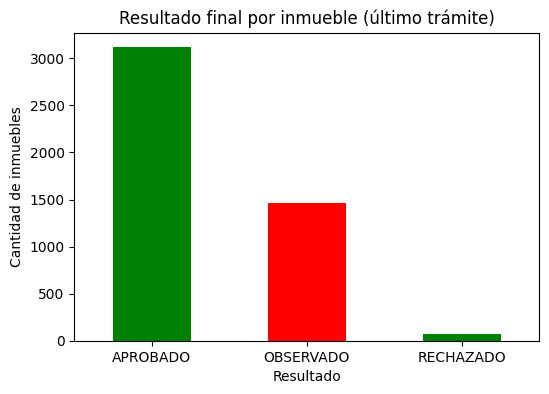

In [ ]:
import matplotlib.pyplot as plt

# Contar resultados finales (ya sin duplicados)
conteo_resultados = df_sin_duplicados["resultado"].value_counts()
print(conteo_resultados)

# Graficar
plt.figure(figsize=(6,4))
conteo_resultados.plot(kind="bar", color=["green", "red"])
plt.title("Resultado final por inmueble (último trámite)")
plt.xlabel("Resultado")
plt.ylabel("Cantidad de inmuebles")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Remover registros con resultado = 'RECHAZADO'
df_filtrado = df_sin_duplicados[df_sin_duplicados["resultado"] != "RECHAZADO"]

# Verificar distribución
print(df_filtrado["resultado"].value_counts())

df_filtrado.to_csv("df_filtrado.csv",index=False)


resultado
APROBADO     3116
OBSERVADO    1460
Name: count, dtype: int64


<Axes: >

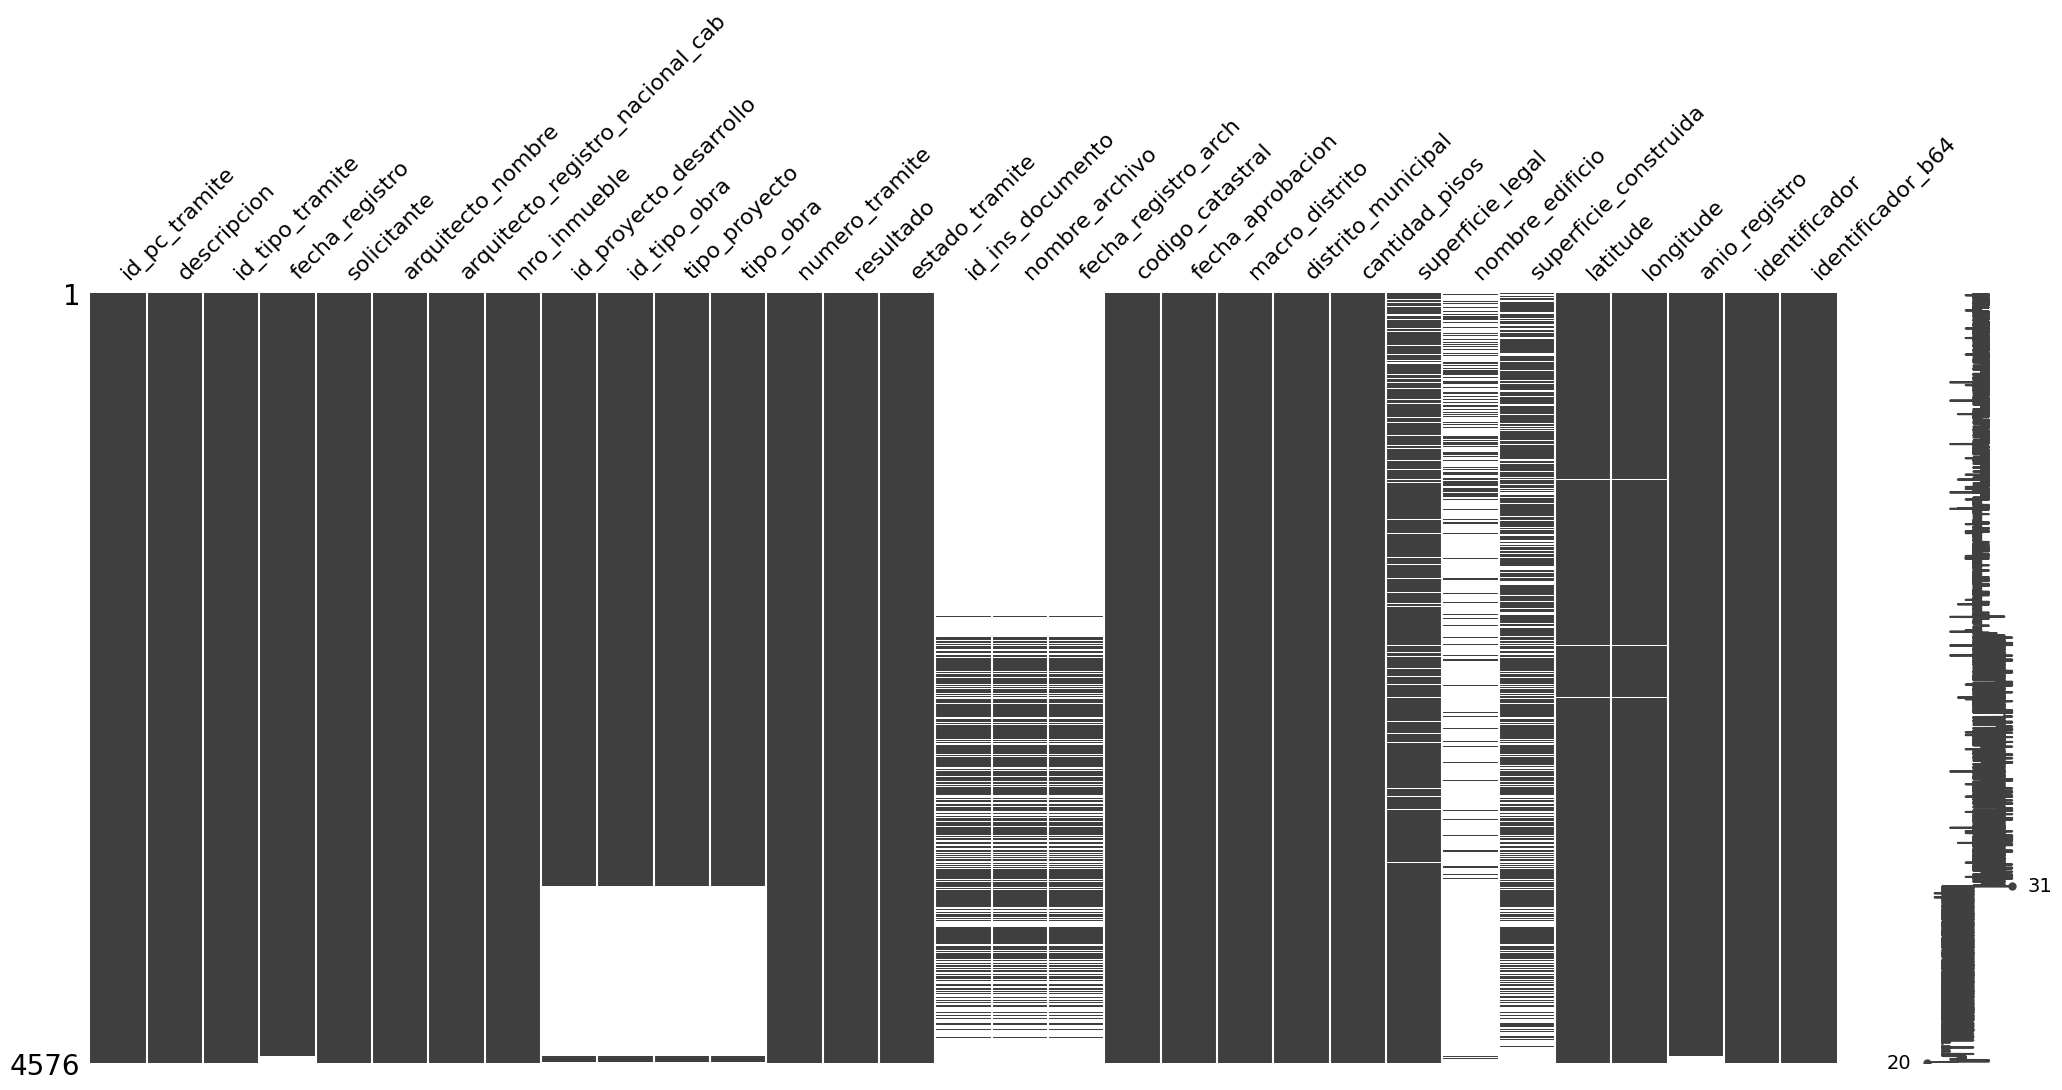

In [ ]:
# matriz de nulos
msno.matrix(df_filtrado)

# Cargamos HTML
para mezclar con nuestra data de API limpia

In [ ]:
df_html = pd.read_csv("tramites_html_identificador.csv",dtype={"gral__codigo_catastral": str})

In [ ]:
# Hacemos left merge desde df_sin_duplicados hacia df_html
df_merge = pd.merge(
    df_filtrado,     # la base principal
    df_html,               # datos adicionales
    on="identificador_b64", # campo común
    how="left"
)

# Verificar resultado
print(df_merge.shape)
df_merge.head()


(4577, 60)


id_pc_tramite              descripcion  id_tipo_tramite  \
0              6  PERMISO DE CONSTRUCCION                1   
1              9  PERMISO DE CONSTRUCCION                1   
2             10  PERMISO DE CONSTRUCCION                1   
3             24  PERMISO DE CONSTRUCCION                1   
4             25  PERMISO DE CONSTRUCCION                1   

                     fecha_registro                     solicitante  \
0  2017-11-17 14:06:48.467000+00:00       FAVIO LUIS IPORRE ANDRADE   
1  2017-11-20 17:18:52.080000+00:00  IRENE MARCELA GONZALES DE CRUZ   
2  2017-11-21 13:59:08.027000+00:00        ROSARIO MORALES VISCARRA   
3  2017-11-23 15:00:05.337000+00:00      JESUS HENRY ARUQUIPA PILUY   
4  2017-11-24 13:53:40.680000+00:00           ELIAS HERRERA PANTOJA   

                arquitecto_nombre  arquitecto_registro_nacional_cab  \
0       OSVALDO QUISPE  FERNANDEZ                             13123   
1          ARIEL HUANCA RODRIGUEZ                              2033   
2  MARIO GENARO VEIZAGA GUTIERREZ                              2626   
3  PAOLA ALEJANDRA SILVA QUISBERT                              7730   
4         ERICK DAVID FLORES COCA                              8245   

  nro_inmueble  id_proyecto_desarrollo  id_tipo_obra  ... par__lateral_2  \
0       274753                     8.0           2.0  ...            NaN   
1        97760                     8.0           2.0  ...        0.00 ml   
2       146441                     8.0           2.0  ...        0.00 ml   
3        68702                     8.0           2.0  ...            NaN   
4       293513                     8.0           2.0  ...            NaN   

  par__mezzanine  par__nmp_sub_numero_minimo_de_parqueos  \
0            NaN                                     NaN   
1        0.00 m2                              6 unidades   
2        0.00 m2                              2 unidades   
3            NaN                                     NaN   
4            NaN                                     NaN   

  par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal  \
0                                                NaN            
1                                            0.00 ml            
2                                           10.68 ml            
3                                                NaN            
4                                                NaN            

  par__rme_zocalo_sub_retiro_minimo_de_edificacion_zocalo_sub_frontal  \
0                                                NaN                    
1                                            0.00 ml                    
2                                            0.00 ml                    
3                                                NaN                    
4                                                NaN                    

   par__semisotano par__torre par__voladizo_sub_voladizo_sobre_retiro_frontal  \
0              NaN        NaN                                             NaN   
1     null plantas  5 plantas                                         0.00 ml   
2     null plantas  3 plantas                                         0.00 ml   
3              NaN        NaN                                             NaN   
4              NaN        NaN                                             NaN   

  par__zocalo                                                url  
0         NaN                                                NaN  
1   0 plantas  https://sitservicios.lapaz.bo/situtiles/pc/?MD...  
2   0 plantas  https://sitservicios.lapaz.bo/situtiles/pc/?MD...  
3         NaN                                                NaN  
4         NaN                                                NaN  

[5 rows x 60 columns]

<Axes: >

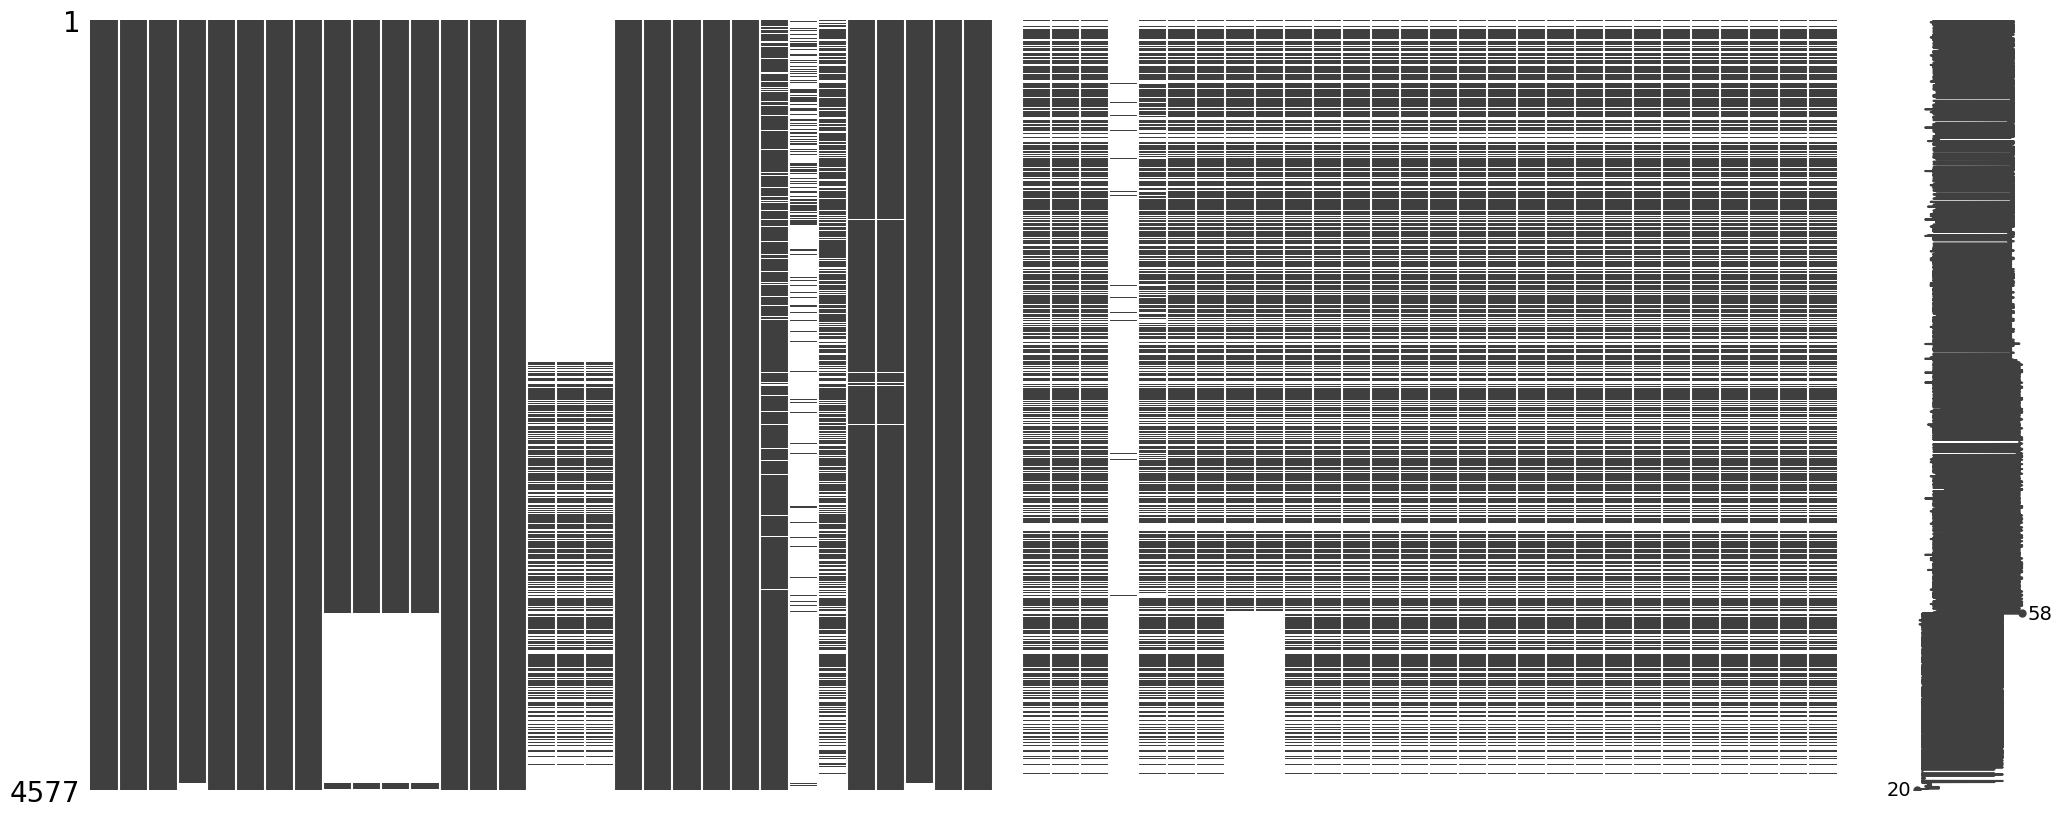

In [ ]:
# matriz de nulos
msno.matrix(df_merge)

In [ ]:
df_merge.to_csv("df_merge_base.csv",index=False)

In [ ]:
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 60 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   id_pc_tramite                                                        4577 non-null   int64  
 1   descripcion                                                          4577 non-null   object 
 2   id_tipo_tramite                                                      4577 non-null   int64  
 3   fecha_registro                                                       4535 non-null   object 
 4   solicitante                                                          4577 non-null   object 
 5   arquitecto_nombre                                                    4577 non-null   object 
 6   arquitecto_registro_nacional_cab                                     4577 non-null   int64  
 7   nro_in

In [ ]:
# Columnas que no son relevantes para el análisis supervisado
cols_drop = [
    "id_pc_tramite", "descripcion", "numero_tramite",
    "identificador", "identificador_b64",
    "codigo_catastral",
    "fecha_registro", "fecha_aprobacion",
    "gral__codigo_catastral", "gral__fecha_aprobacion",
    "nombre_archivo", "url", "error",
    "nombre_edificio",
    "solicitante", "arquitecto_nombre","otro__arquitecto_reponsable",
    "arquitecto_registro_nacional_cab",
    "id_ins_documento",
    "fecha_registro_arch",
    "nro_inmueble",
    "estado_tramite",
"tipo_proyecto",
"tipo_obra",
"fecha_registro_arch",
"codigo_catastral",
"anio_registro",
"gral__informe",
"gral__normativa_segun_informe",
"otro__tipo_de_obra",
"otro__tipo_de_proyecto",
]

# Crear dataset limpio
df_modelo = df_merge.drop(columns=cols_drop)

# Verificar shape
print(df_modelo.shape)
print(df_modelo.info())
df_modelo.head()


(4577, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 31 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   id_tipo_tramite                                                      4577 non-null   int64  
 1   id_proyecto_desarrollo                                               3562 non-null   float64
 2   id_tipo_obra                                                         3562 non-null   float64
 3   resultado                                                            4577 non-null   object 
 4   macro_distrito                                                       4577 non-null   object 
 5   distrito_municipal                                                   4577 non-null   int64  
 6   cantidad_pisos                                                       4576 non-null   float64


id_tipo_tramite  id_proyecto_desarrollo  id_tipo_obra  resultado  \
0                1                     8.0           2.0  OBSERVADO   
1                1                     8.0           2.0   APROBADO   
2                1                     8.0           2.0   APROBADO   
3                1                     8.0           2.0  OBSERVADO   
4                1                     8.0           2.0  OBSERVADO   

     macro_distrito  distrito_municipal  cantidad_pisos  superficie_legal  \
0      VII - CENTRO                   2             4.0            136.09   
1           V - SUR                  18             5.0            365.64   
2           V - SUR                  18             3.0            300.00   
3      I - COTAHUMA                   5             2.0            159.20   
4  IV - SAN ANTONIO                  14             3.0             88.00   

   superficie_construida   latitude  ...  par__lateral_1 par__lateral_2  \
0                    NaN -16.490324  ...             NaN            NaN   
1                1232.69 -16.540992  ...         3.10 ml        0.00 ml   
2                 285.28 -16.511015  ...         0.00 ml        0.00 ml   
3                    NaN -16.511132  ...             NaN            NaN   
4                    NaN -16.489860  ...             NaN            NaN   

  par__mezzanine par__nmp_sub_numero_minimo_de_parqueos  \
0            NaN                                    NaN   
1        0.00 m2                             6 unidades   
2        0.00 m2                             2 unidades   
3            NaN                                    NaN   
4            NaN                                    NaN   

  par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal  \
0                                                NaN            
1                                            0.00 ml            
2                                           10.68 ml            
3                                                NaN            
4                                                NaN            

  par__rme_zocalo_sub_retiro_minimo_de_edificacion_zocalo_sub_frontal  \
0                                                NaN                    
1                                            0.00 ml                    
2                                            0.00 ml                    
3                                                NaN                    
4                                                NaN                    

  par__semisotano par__torre par__voladizo_sub_voladizo_sobre_retiro_frontal  \
0             NaN        NaN                                             NaN   
1    null plantas  5 plantas                                         0.00 ml   
2    null plantas  3 plantas                                         0.00 ml   
3             NaN        NaN                                             NaN   
4             NaN        NaN                                             NaN   

  par__zocalo  
0         NaN  
1   0 plantas  
2   0 plantas  
3         NaN  
4         NaN  

[5 rows x 31 columns]

<Axes: >

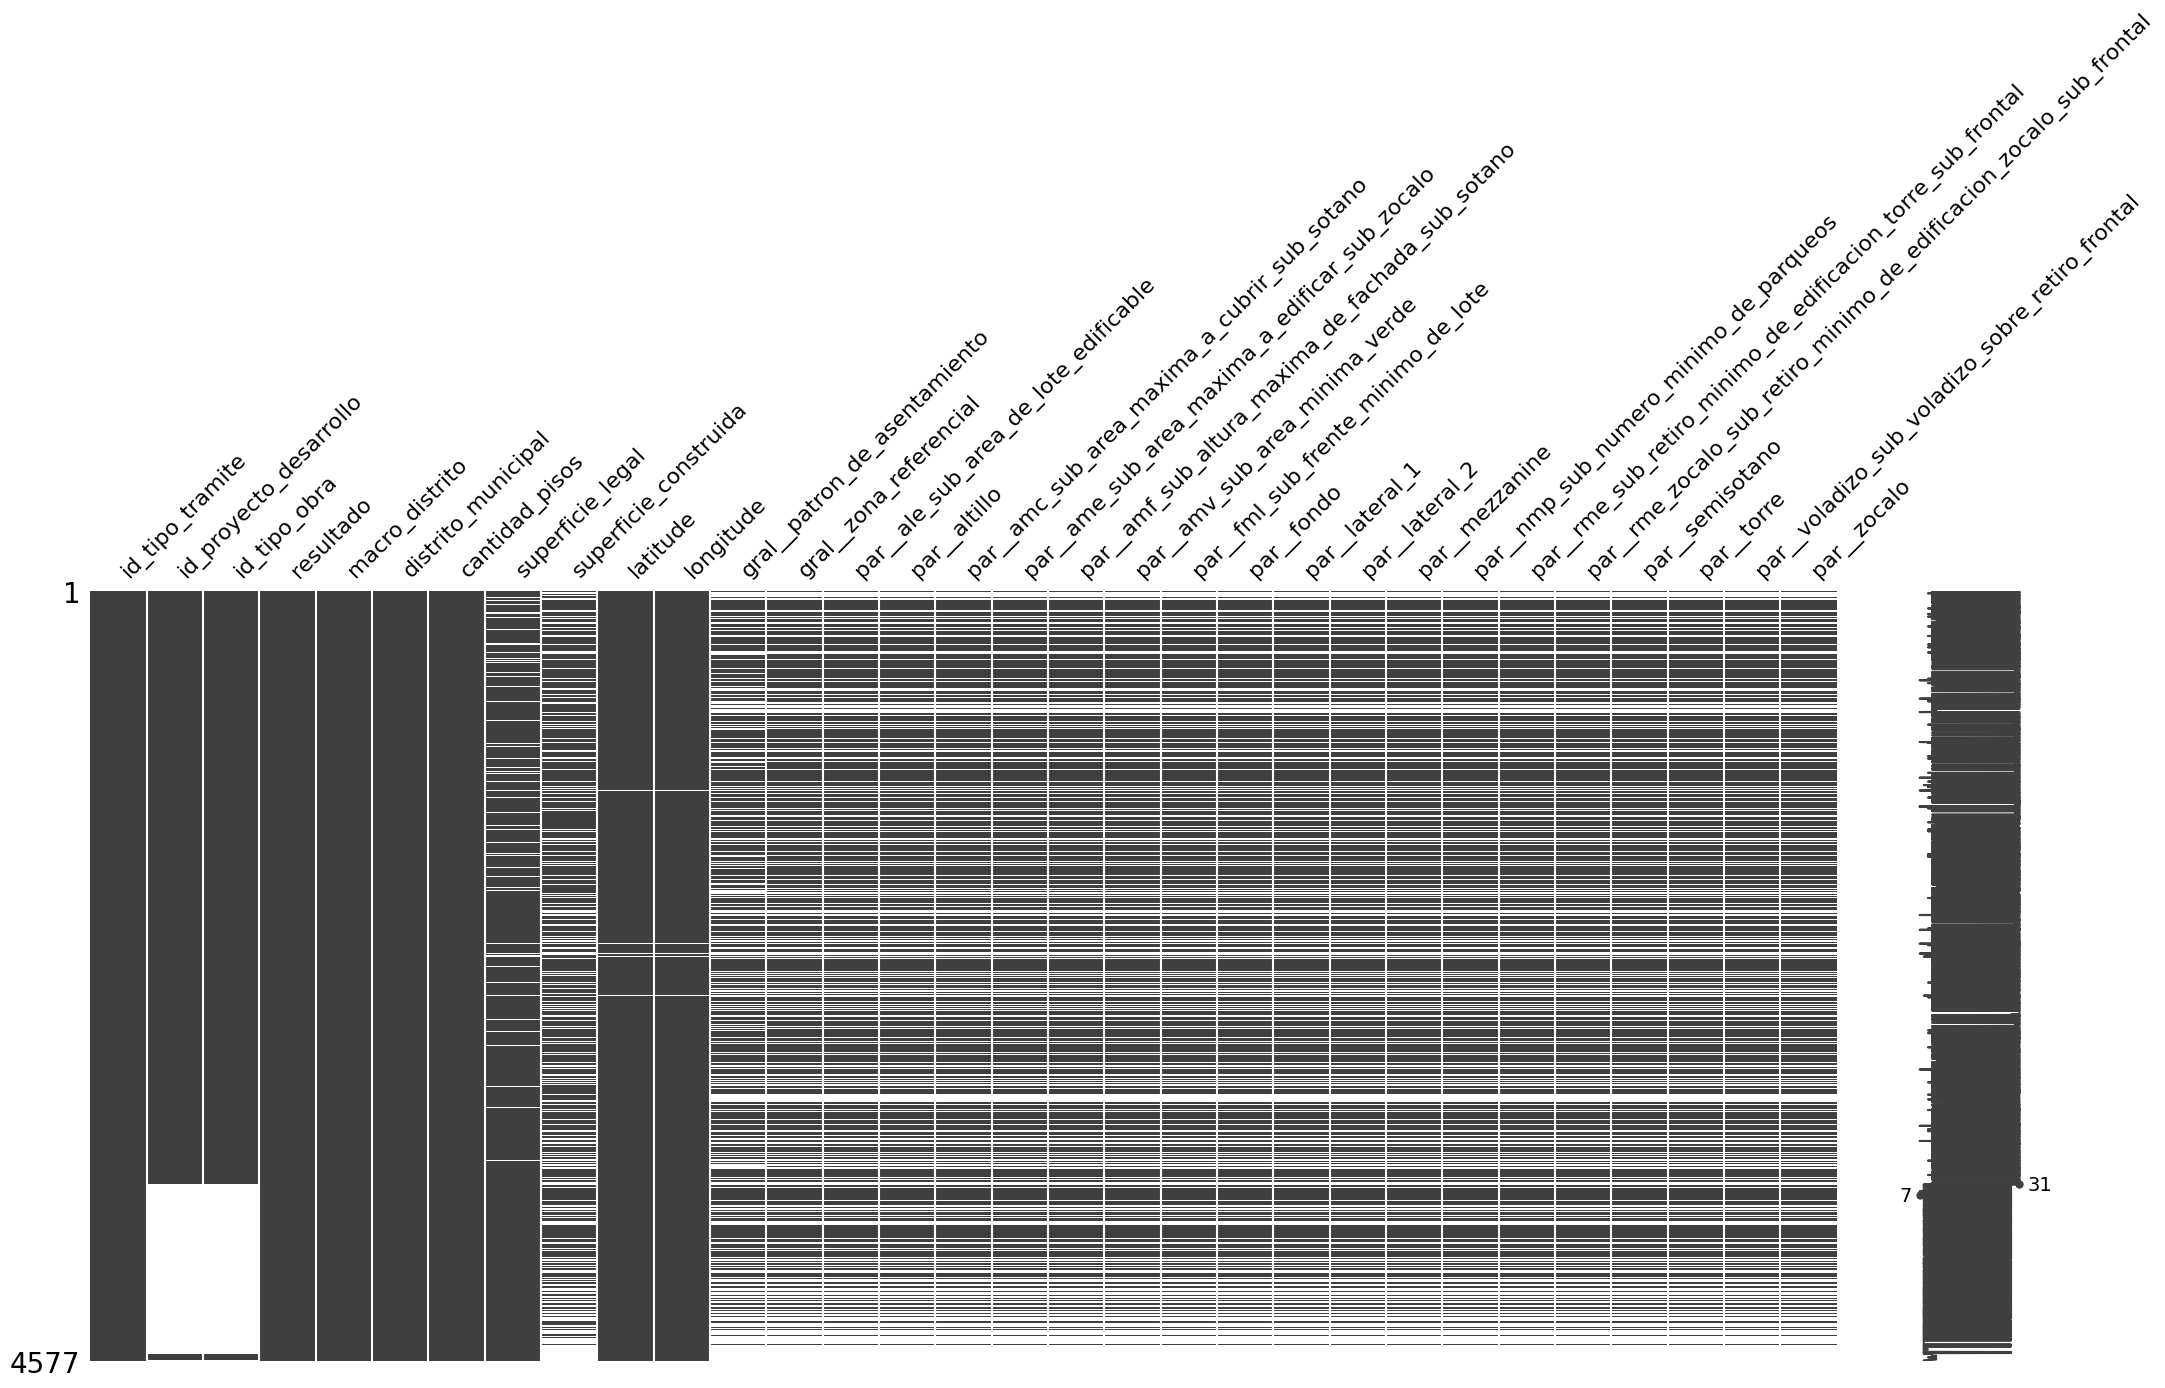

In [ ]:
# matriz de nulos
msno.matrix(df_modelo)

In [ ]:
# Porcentaje de nulos
nulls = df_modelo.isnull().mean().sort_values(ascending=False) * 100
print(nulls.head(20))

gral__patron_de_asentamiento                                           37.207778
par__altillo                                                           35.241425
gral__zona_referencial                                                 35.241425
par__ale_sub_area_de_lote_edificable                                   35.241425
par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal            35.241425
par__nmp_sub_numero_minimo_de_parqueos                                 35.241425
par__mezzanine                                                         35.241425
par__lateral_2                                                         35.241425
par__lateral_1                                                         35.241425
par__fondo                                                             35.241425
par__fml_sub_frente_minimo_de_lote                                     35.241425
par__amv_sub_area_minima_verde                                         35.241425
par__amf_sub_altura_maxima_d

In [ ]:
# eliminamos columnas con mas del 90% vacios
df_clean = df_modelo.dropna(axis=1, thresh=int(0.1 * len(df_merge)))
nulls = df_clean.isnull().mean().sort_values(ascending=False) * 100
print(nulls.head(20))

gral__patron_de_asentamiento                                           37.207778
par__altillo                                                           35.241425
gral__zona_referencial                                                 35.241425
par__ale_sub_area_de_lote_edificable                                   35.241425
par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal            35.241425
par__nmp_sub_numero_minimo_de_parqueos                                 35.241425
par__mezzanine                                                         35.241425
par__lateral_2                                                         35.241425
par__lateral_1                                                         35.241425
par__fondo                                                             35.241425
par__fml_sub_frente_minimo_de_lote                                     35.241425
par__amv_sub_area_minima_verde                                         35.241425
par__amf_sub_altura_maxima_d

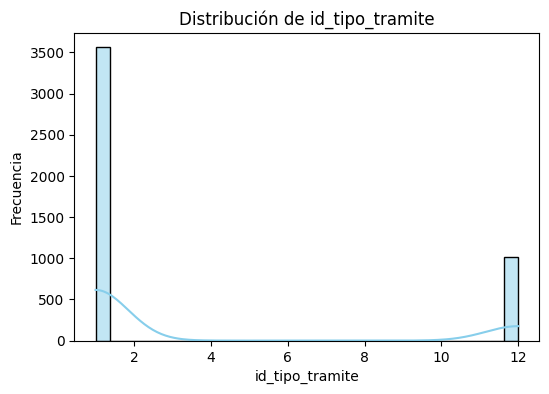

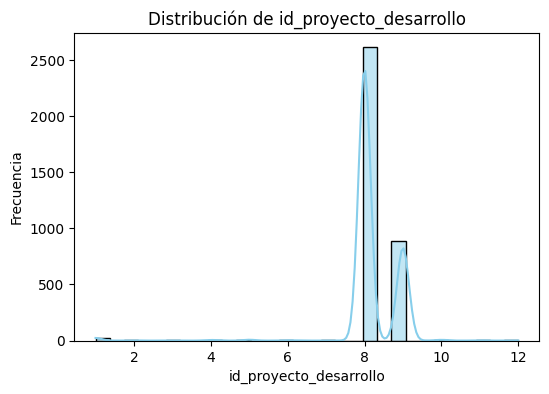

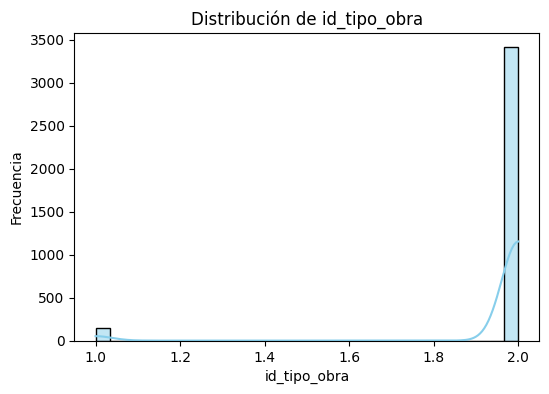

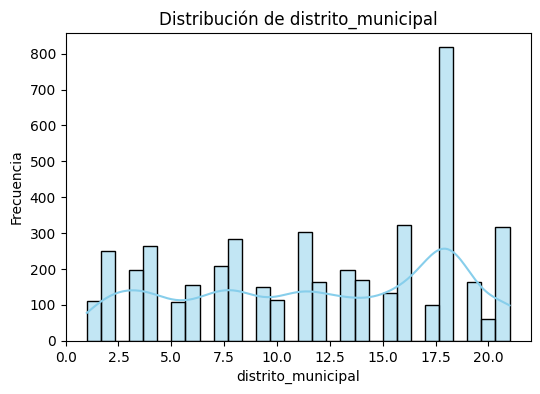

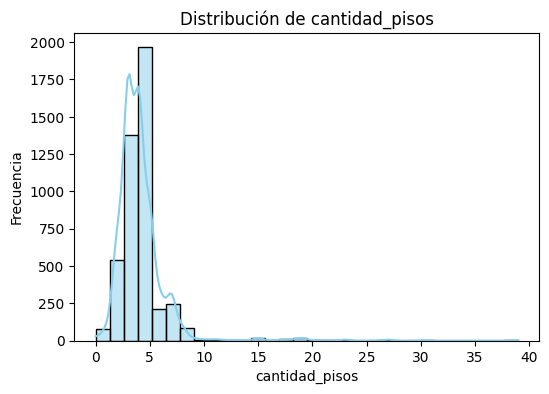

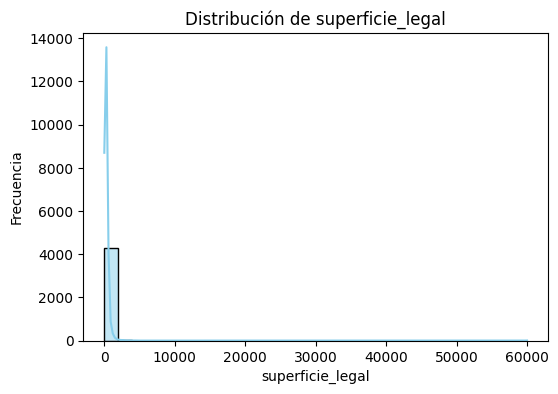

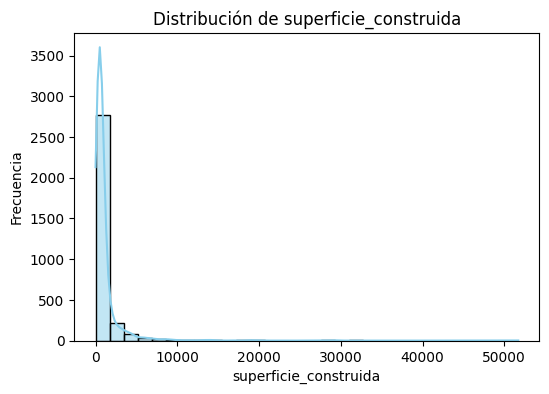

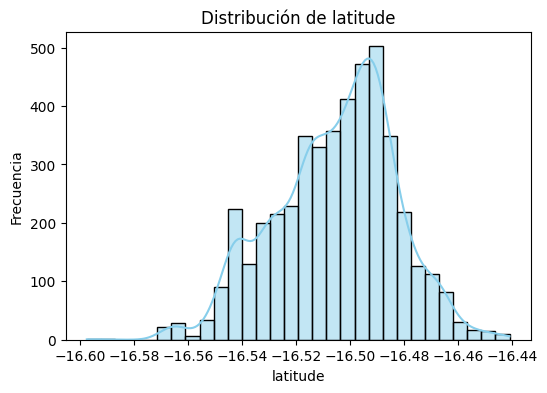

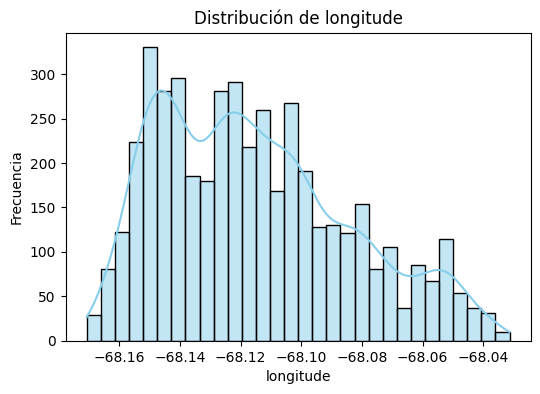

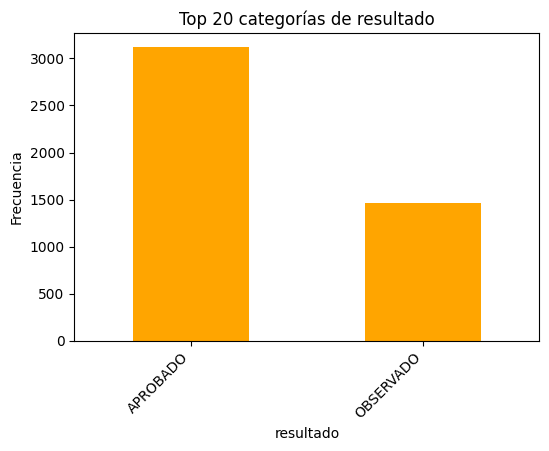

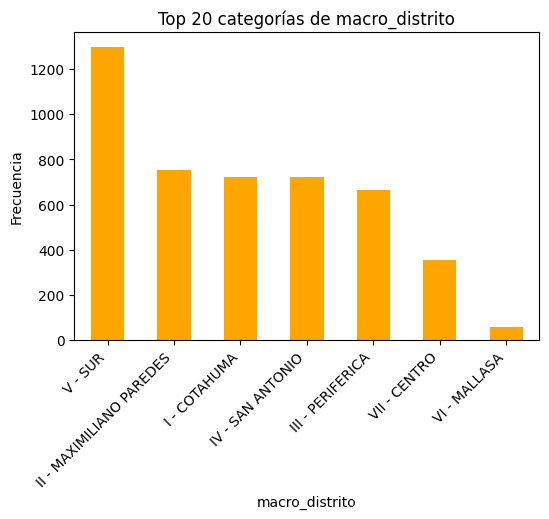

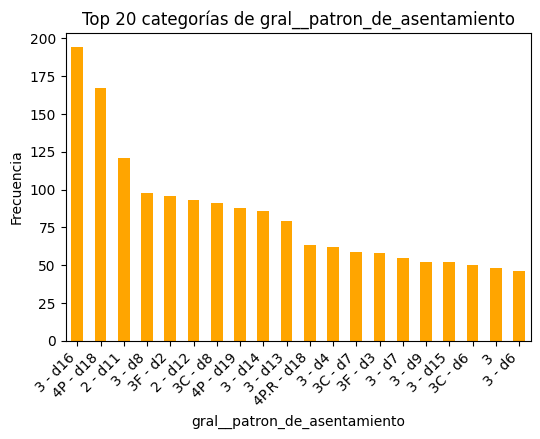

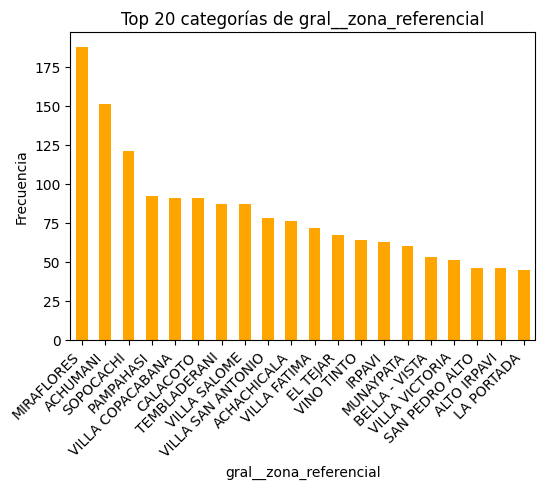

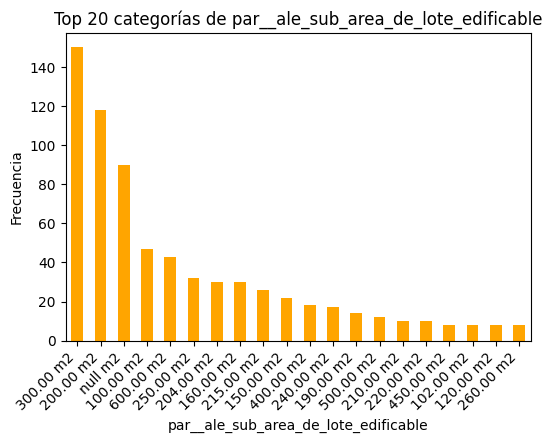

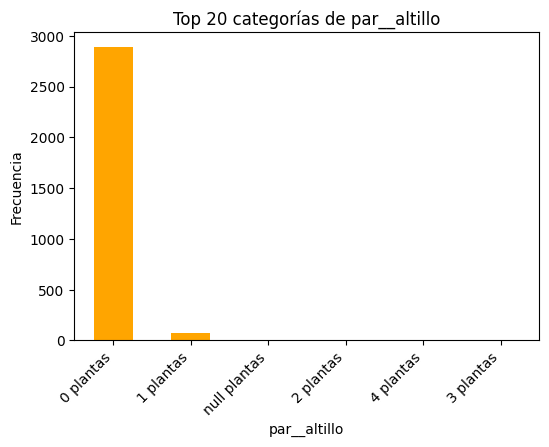

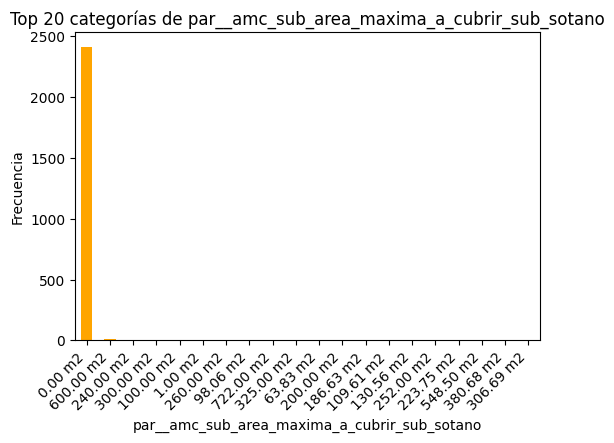

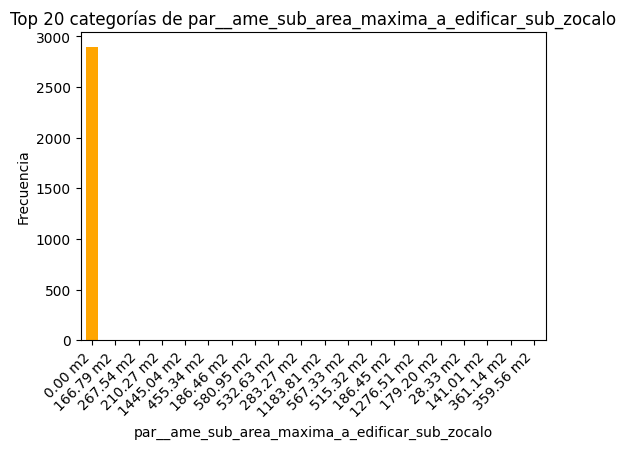

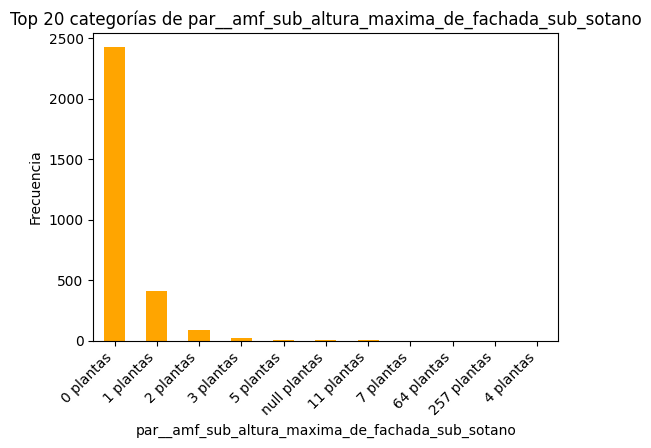

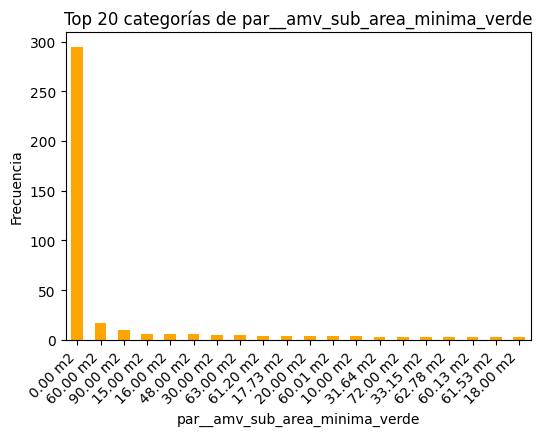

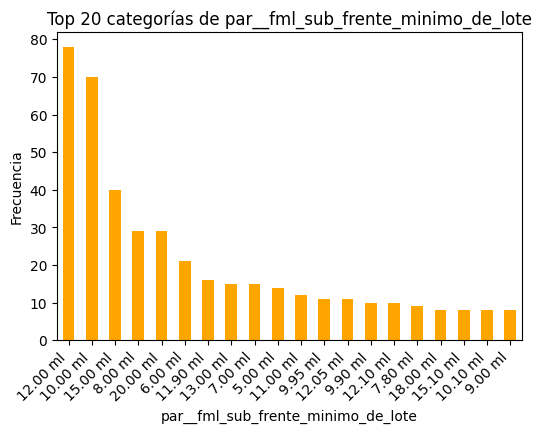

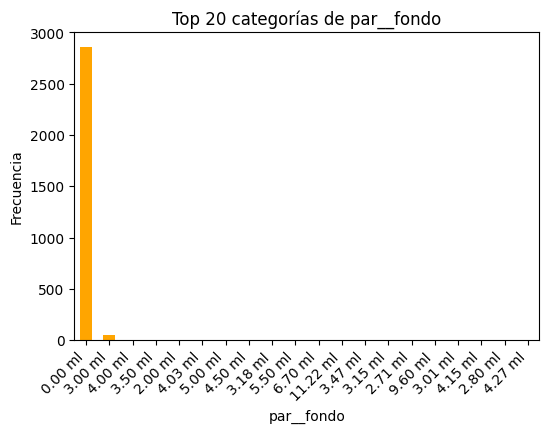

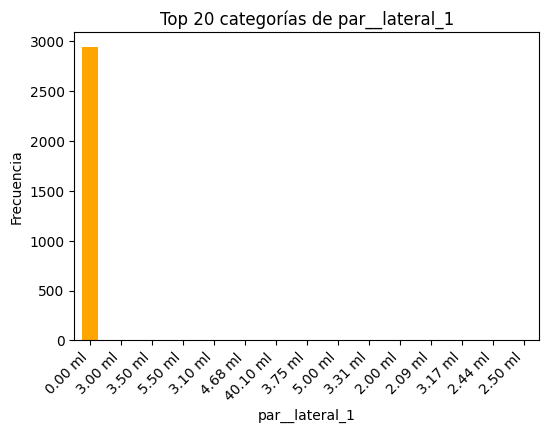

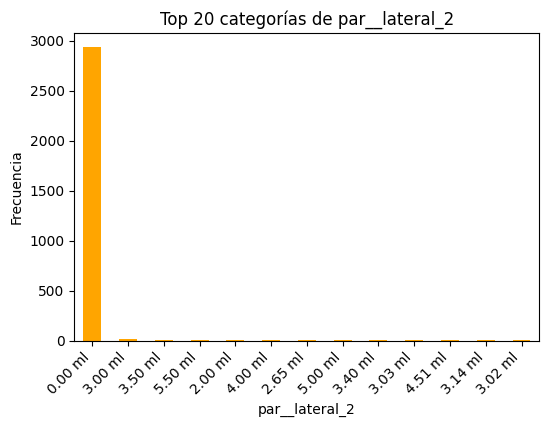

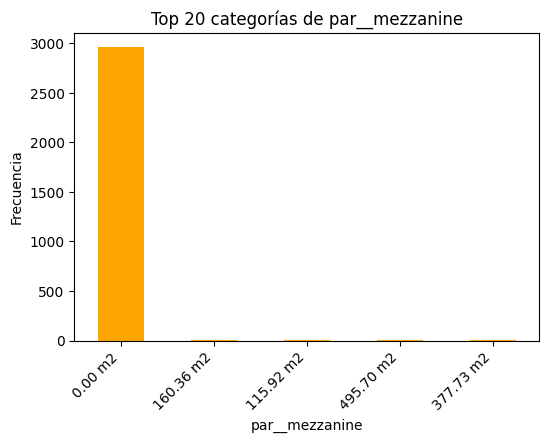

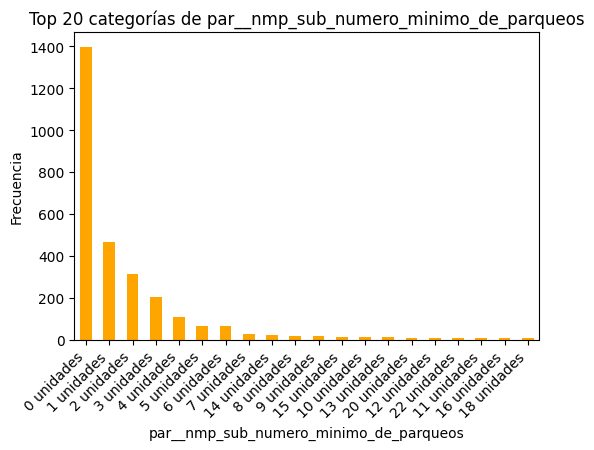

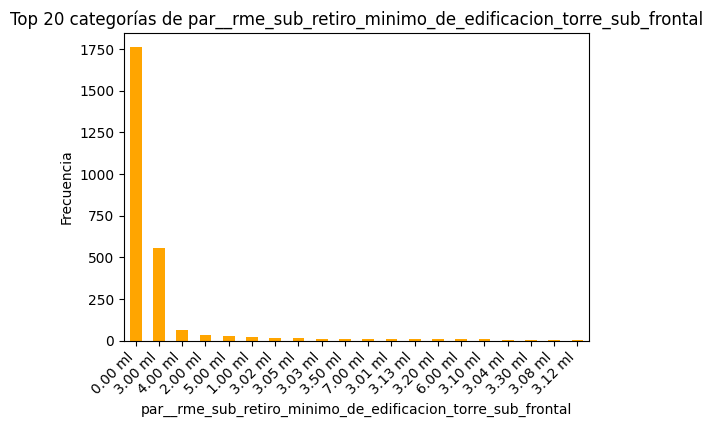

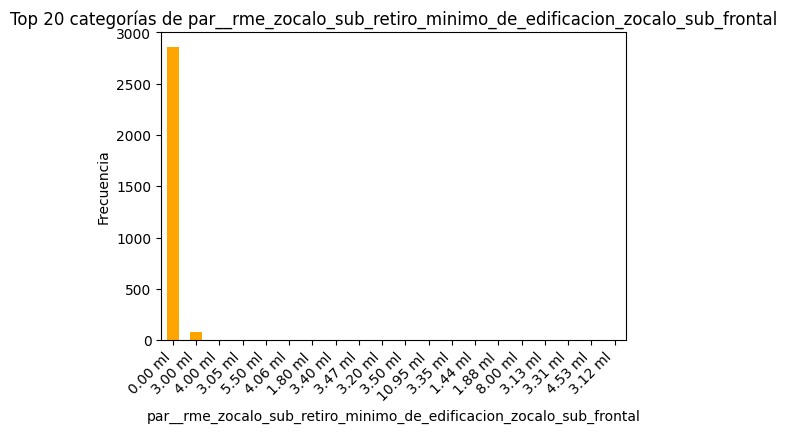

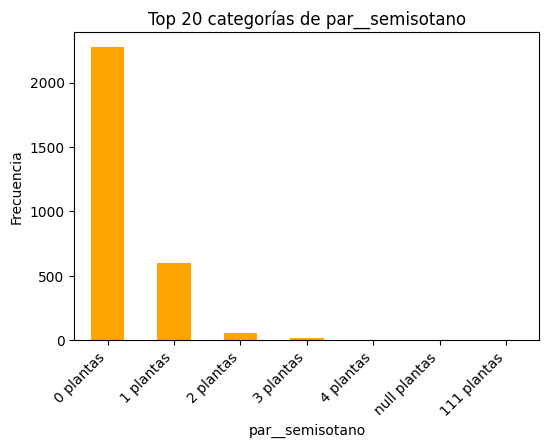

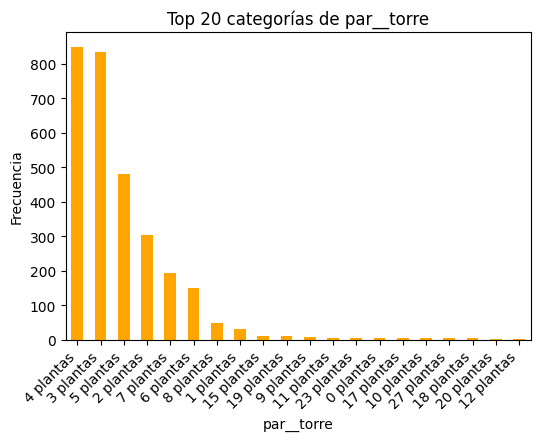

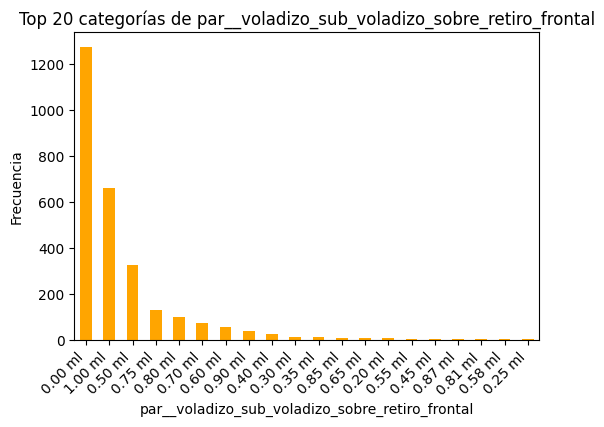

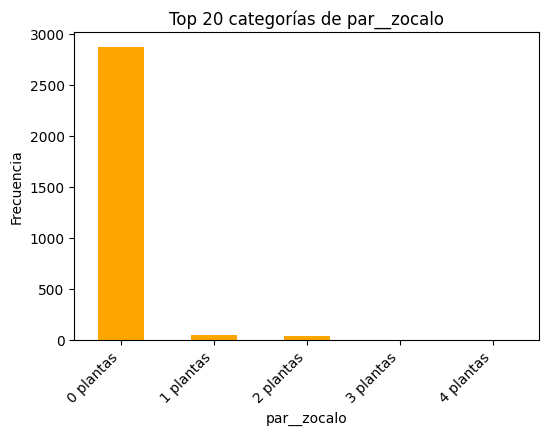

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar columnas numéricas y categóricas
num_cols = df_modelo.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_modelo.select_dtypes(include=["object"]).columns

# --------- Graficar numéricas ---------
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_modelo[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# --------- Graficar categóricas ---------
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df_modelo[col].value_counts().head(20).plot(kind="bar", color="orange")
    plt.title(f"Top 20 categorías de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.show()


# transformamos columnas de scrapy



In [ ]:
df_modelo.to_csv("df_modelo.csv",index=False)

In [ ]:
df_modelo = pd.read_csv("df_modelo.csv")

In [ ]:
cols_a_revisar = ["id_proyecto_desarrollo", "id_tipo_obra","resultado","macro_distrito","distrito_municipal","cantidad_pisos","superficie_legal","superficie_construida"]

for col in cols_a_revisar:
    print(f"\n--- Conteo de {col} ---")
    print(df_modelo[col].value_counts(dropna=False))



--- Conteo de id_proyecto_desarrollo ---
id_proyecto_desarrollo
8.0     2614
NaN     1015
9.0      891
1.0       25
5.0        8
10.0       7
4.0        6
11.0       3
6.0        3
2.0        2
7.0        1
12.0       1
3.0        1
Name: count, dtype: int64

--- Conteo de id_tipo_obra ---
id_tipo_obra
2.0    3410
NaN    1015
1.0     152
Name: count, dtype: int64

--- Conteo de resultado ---
resultado
APROBADO     3117
OBSERVADO    1460
Name: count, dtype: int64

--- Conteo de macro_distrito ---
macro_distrito
V - SUR                     1298
II - MAXIMILIANO PAREDES     754
I - COTAHUMA                 722
IV - SAN ANTONIO             722
III - PERIFERICA             665
VII - CENTRO                 357
VI - MALLASA                  59
Name: count, dtype: int64

--- Conteo de distrito_municipal ---
distrito_municipal
18    818
16    321
21    318
11    302
8     282
4     264
2     249
7     209
3     197
13    197
14    170
12    164
19    162
6     154
9     149
15    132
10    113

In [ ]:
df_nan_superficie = df_modelo[df_modelo["superficie_legal"].isna()]

conteo_nan = (
    df_nan_superficie.groupby("resultado")["superficie_legal"]
    .size()
    .reset_index(name="cantidad")
)

print(conteo_nan)


   resultado  cantidad
0   APROBADO       203
1  OBSERVADO        69


In [ ]:
df_nan_superficie = df_modelo[df_modelo["superficie_construida"].isna()]

conteo_nan = (
    df_nan_superficie.groupby("resultado")["superficie_construida"]
    .size()
    .reset_index(name="cantidad")
)

print(conteo_nan)


   resultado  cantidad
0  OBSERVADO      1423


In [ ]:
def limpiar_unidades(columna):
    """
    Limpia texto en una Serie (columna):
    - Elimina palabras 'unidades', 'plantas', 'm2', 'ml'
    - Reemplaza valores nulos o vacíos por '0'
    - Convierte a float o int si es posible
    """
    # Convertir a string y limpiar unidades comunes
    col_limpia = (
        columna.astype(str)
        .str.lower()
        .str.replace(r"(unidades|plantas|m2|ml)", "", regex=True)
        .str.replace(",", ".", regex=False)  # por si usan coma decimal
        .str.strip()
        .replace(["", "nan", "null"], "0")
    )

    # Convertir a float
    col_numerica = pd.to_numeric(col_limpia, errors="coerce").fillna(0)

    # Si todos los valores son equivalentes a su versión entera => castear a int
    if np.allclose(col_numerica, col_numerica.astype(int)):
        col_numerica = col_numerica.astype(int)

    return col_numerica


# Limpieza

In [ ]:
# id_tipo_tramite - convertimos es_agil
df_modelo["es_agil"] = df_modelo["id_tipo_tramite"] == 12

# id_proyecto_desarrollo
# Reemplazar NaN por 0
df_modelo["id_proyecto_desarrollo"] = df_modelo["id_proyecto_desarrollo"].fillna(12)
# Convertir a integer (int)
df_modelo["id_proyecto_desarrollo"] = df_modelo["id_proyecto_desarrollo"].astype(int)

# convertimos tipo de obra en es ampliacion?
# Reemplazar NaN por 1 primero 1= Construccion Nueva
df_modelo["id_tipo_obra"] = df_modelo["id_tipo_obra"].fillna(1).astype(int)
# Crear campo booleano: True = Ampliación, False = Nueva
df_modelo["es_ampliacion"] = df_modelo["id_tipo_obra"] == 2

# Cantidad de pisos
# Reemplazar NaN por 0
df_modelo["cantidad_pisos"] = df_modelo["cantidad_pisos"].fillna(0)
# Convertir a entero (int)
df_modelo["cantidad_pisos"] = df_modelo["cantidad_pisos"].astype(int)

# Borramos los que son superficie_legal Nan
df_modelo = df_modelo.dropna(subset=["superficie_legal"])

# Superficie construida
# Reemplazar NaN por 0
df_modelo["superficie_construida"] = df_modelo["superficie_construida"].fillna(0)

# reducimos lon/lat a 6 decimales para no hacerlos tan especificos
df_modelo["latitude"] = df_modelo["latitude"].round(6)
df_modelo["longitude"] = df_modelo["longitude"].round(6)

# rellenamos con desconocido estas features literales
cols_a_rellenar = ["gral__patron_de_asentamiento", "gral__zona_referencial"]
for col in cols_a_rellenar:
    df_modelo[col] = df_modelo[col].fillna("DESCONOCIDO")

# limpiamos Strings plantaqs m2 ml
cols_string_limpieza = [
    "par__ale_sub_area_de_lote_edificable",
    "par__altillo",
    "par__amc_sub_area_maxima_a_cubrir_sub_sotano",
    "par__ame_sub_area_maxima_a_edificar_sub_zocalo",
    "par__amf_sub_altura_maxima_de_fachada_sub_sotano",
    "par__amv_sub_area_minima_verde",
    "par__fml_sub_frente_minimo_de_lote",
    "par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal",
    "par__fondo",
    "par__lateral_1",
    "par__lateral_2",
    "par__mezzanine",
    "par__rme_zocalo_sub_retiro_minimo_de_edificacion_zocalo_sub_frontal",
    "par__semisotano",
    "par__torre",
    "par__zocalo",
    "par__voladizo_sub_voladizo_sobre_retiro_frontal",
    "par__nmp_sub_numero_minimo_de_parqueos"
    ]
for col in cols_string_limpieza:
    df_modelo[col] = limpiar_unidades(df_modelo[col])


# Convertimos a categoricas
cols_categoricas = ["resultado", "macro_distrito", "distrito_municipal","gral__patron_de_asentamiento","gral__zona_referencial"]

for col in cols_categoricas:
    df_modelo[col] = df_modelo[col].astype("category")


df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4305 entries, 0 to 4576
Data columns (total 33 columns):
 #   Column                                                               Non-Null Count  Dtype   
---  ------                                                               --------------  -----   
 0   id_tipo_tramite                                                      4305 non-null   int64   
 1   id_proyecto_desarrollo                                               4305 non-null   int64   
 2   id_tipo_obra                                                         4305 non-null   int64   
 3   resultado                                                            4305 non-null   category
 4   macro_distrito                                                       4305 non-null   category
 5   distrito_municipal                                                   4305 non-null   category
 6   cantidad_pisos                                                       4305 non-null   int64   
 7   su

<Axes: >

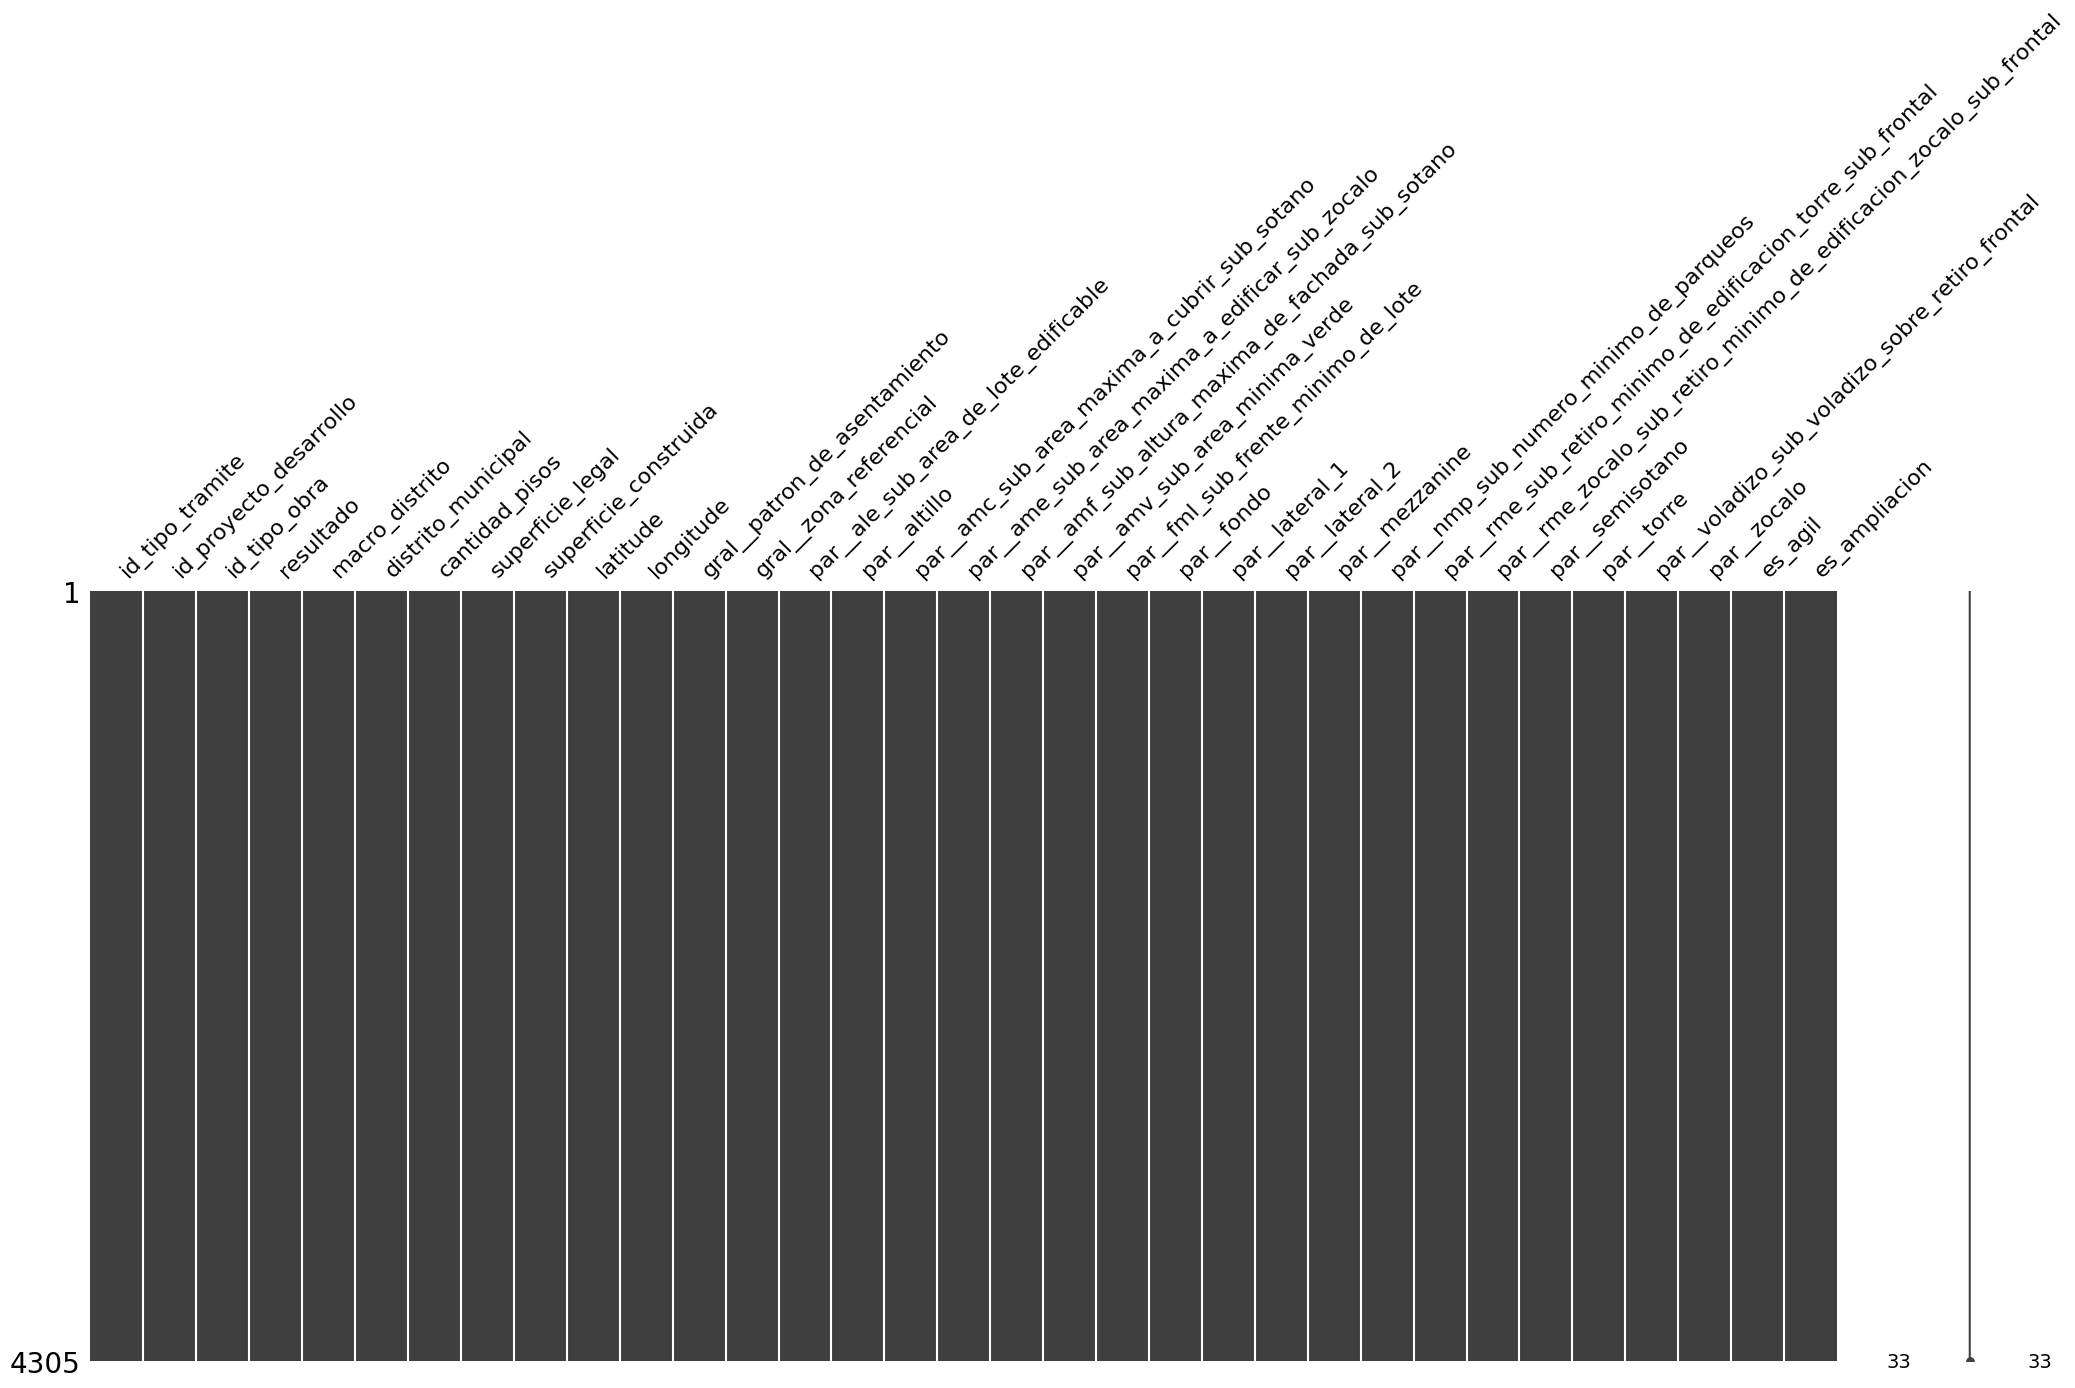

In [ ]:
# matriz de nulos
msno.matrix(df_modelo)

In [ ]:
#Eliminamos columnas ya no necesarias
df_modelo = df_modelo.drop(columns=["id_tipo_tramite","id_tipo_obra"])

In [ ]:
df_modelo.to_csv("df_modelo_limpio_0.csv",index=False)

In [ ]:
df_modelo.describe()

id_proyecto_desarrollo  cantidad_pisos  superficie_legal  \
count             4305.000000     4305.000000       4305.000000   
mean                 9.082462        3.970732        309.329851   
std                  1.761956        2.025529       1010.820234   
min                  1.000000        0.000000          0.000000   
25%                  8.000000        3.000000        160.000000   
50%                  8.000000        4.000000        211.000000   
75%                  9.000000        5.000000        301.000000   
max                 12.000000       39.000000      60000.000000   

       superficie_construida     latitude    longitude  \
count            4305.000000  4305.000000  4305.000000   
mean              639.298859   -16.504818   -68.116181   
std              1524.811729     0.022417     0.031168   
min                 0.000000   -16.597460   -68.170706   
25%                 0.000000   -16.518949   -68.142539   
50%               374.750000   -16.501646   -68.120589   
75%               669.180000   -16.489461   -68.097211   
max             32443.740000   -16.440893   -68.031340   

       par__ale_sub_area_de_lote_edificable  par__altillo  \
count                           4305.000000   4305.000000   
mean                             178.744318      0.014634   
std                              352.525354      0.139767   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                              138.880000      0.000000   
75%                              240.000000      0.000000   
max                            16533.940000      4.000000   

       par__amc_sub_area_maxima_a_cubrir_sub_sotano  \
count                                   4305.000000   
mean                                      69.719343   
std                                     1837.095668   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                   119916.000000   

       par__ame_sub_area_maxima_a_edificar_sub_zocalo  ...  par__lateral_1  \
count                                     4305.000000  ...     4305.000000   
mean                                         7.453707  ...        0.014527   
std                                        131.541961  ...        0.226083   
min                                          0.000000  ...        0.000000   
25%                                          0.000000  ...        0.000000   
50%                                          0.000000  ...        0.000000   
75%                                          0.000000  ...        0.000000   
max                                       6987.850000  ...        5.500000   

       par__lateral_2  par__mezzanine  par__nmp_sub_numero_minimo_de_parqueos  \
count     4305.000000     4305.000000                             4305.000000   
mean         0.017944        0.267064                                2.016492   
std          0.244573        9.963271                                9.903529   
min          0.000000        0.000000                                0.000000   
25%          0.000000        0.000000                                0.000000   
50%          0.000000        0.000000                                0.000000   
75%          0.000000        0.000000                                1.000000   
max          5.500000      495.700000                              320.000000   

       par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal  \
count                                        4305.000000             
mean                                            0.947954             
std                                             2.280833             
min                                             0.000000             
25%                                             0.0

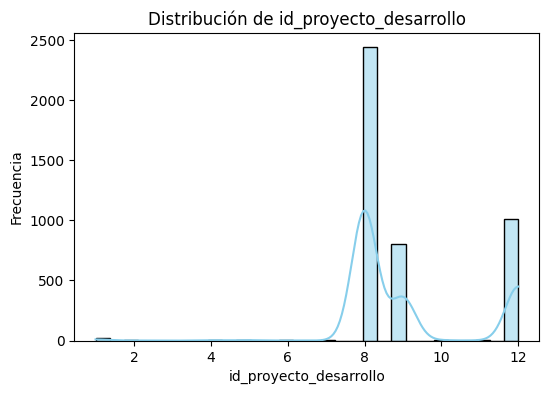

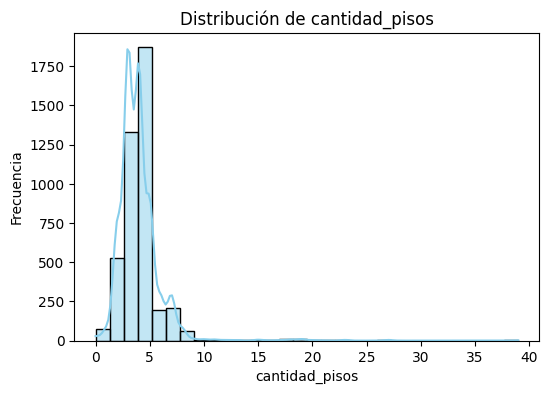

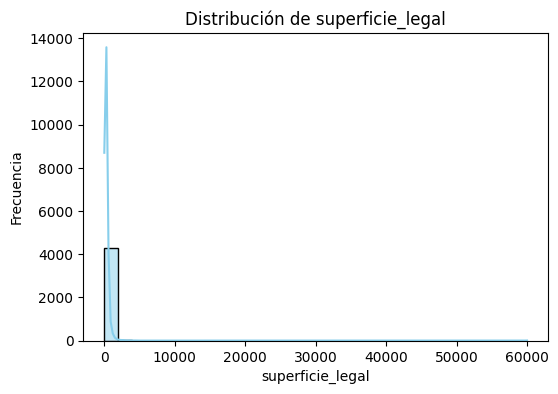

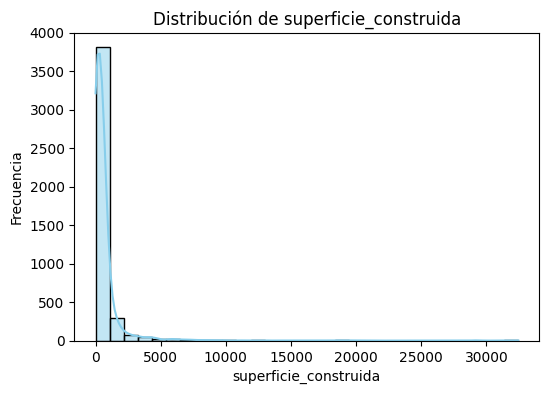

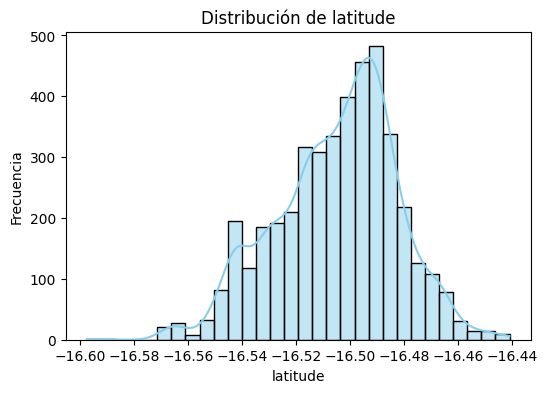

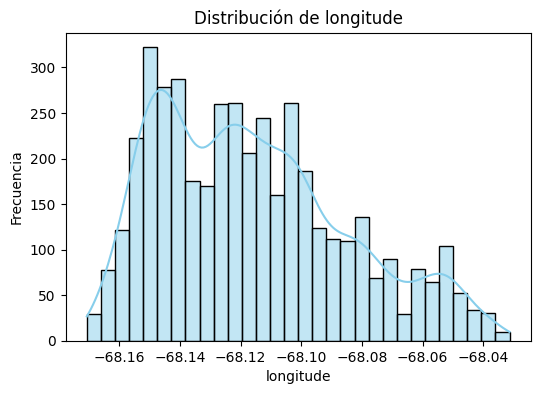

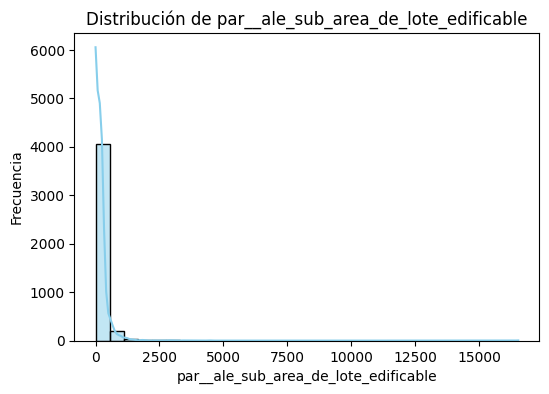

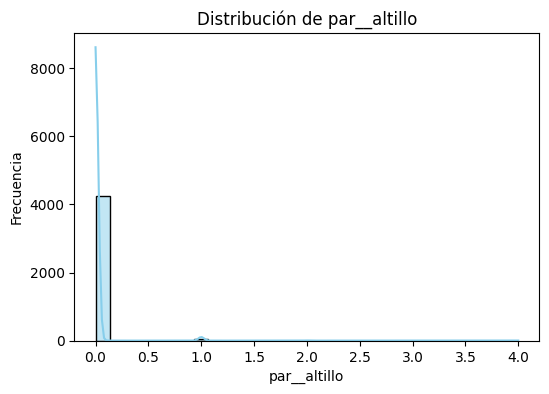

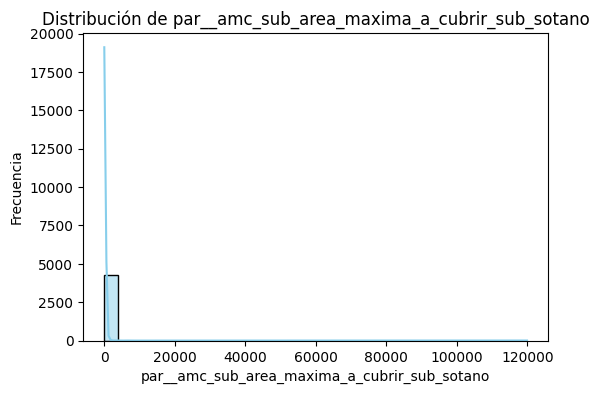

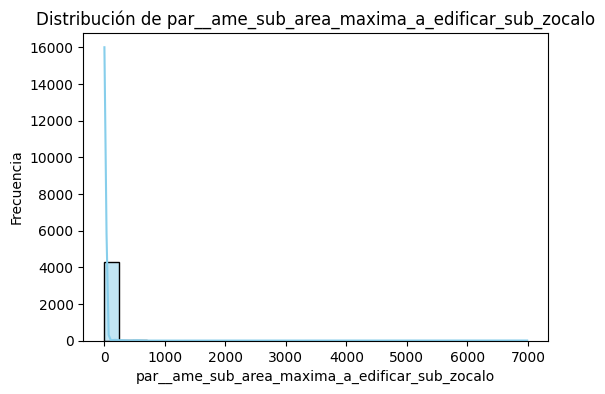

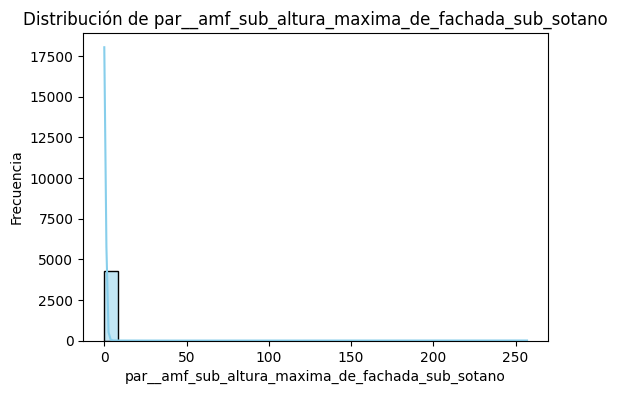

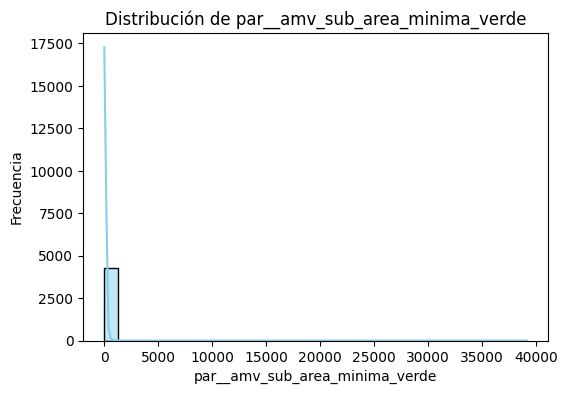

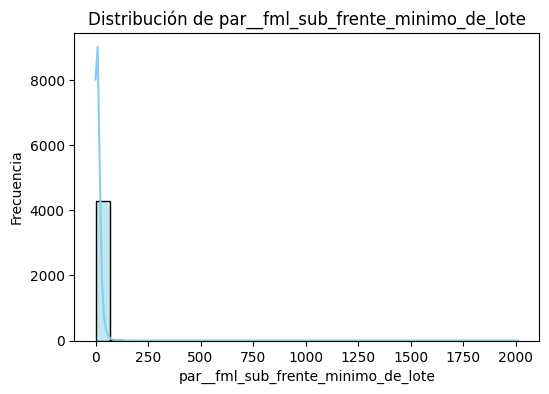

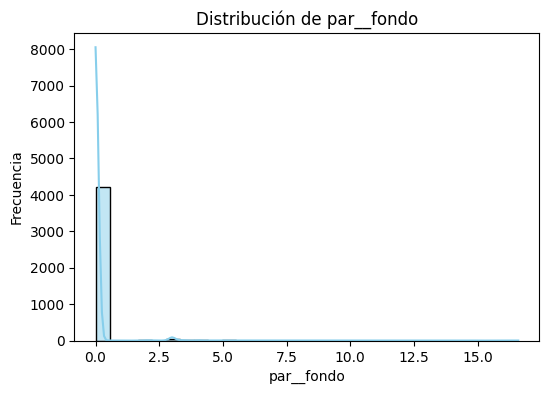

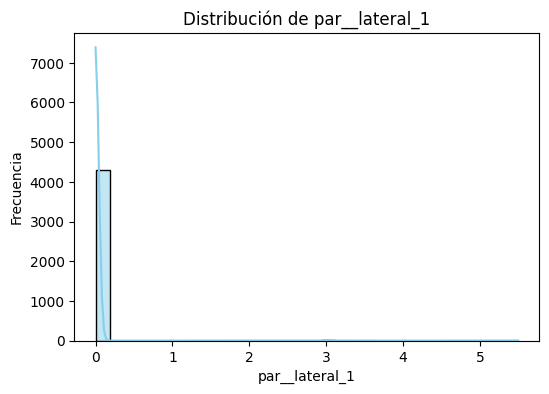

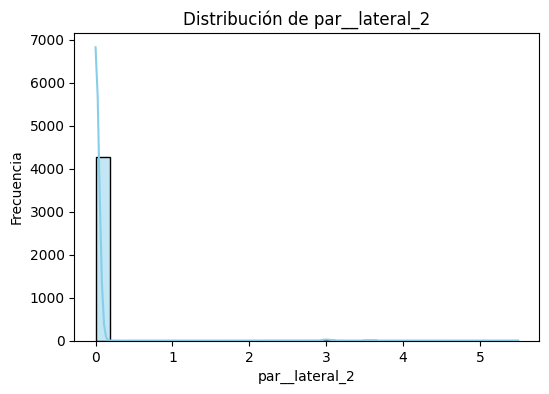

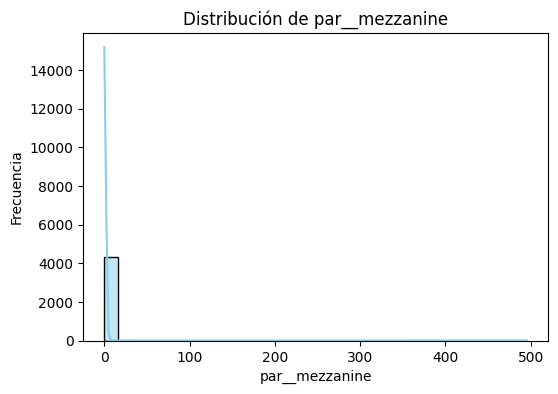

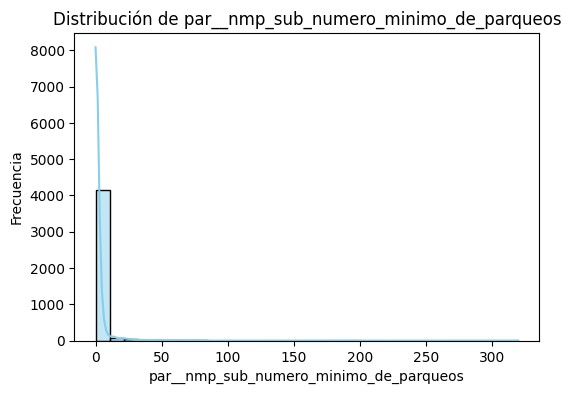

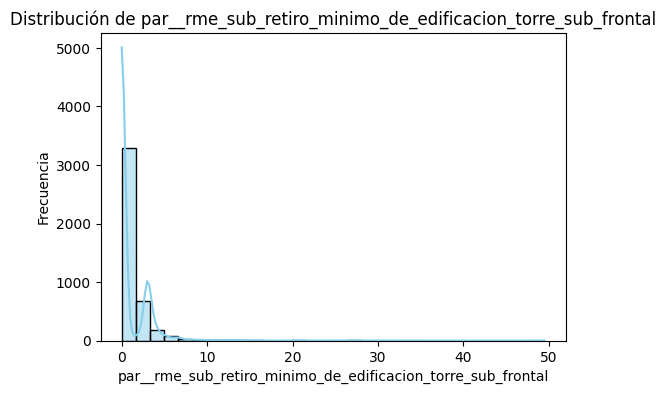

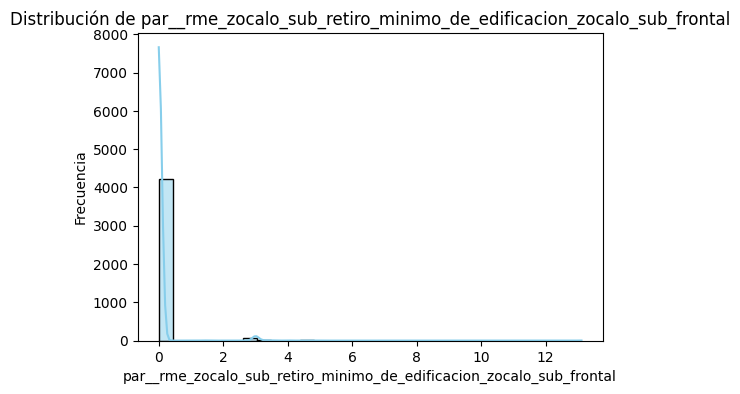

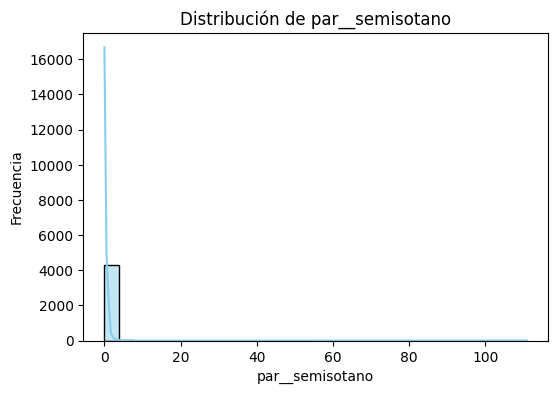

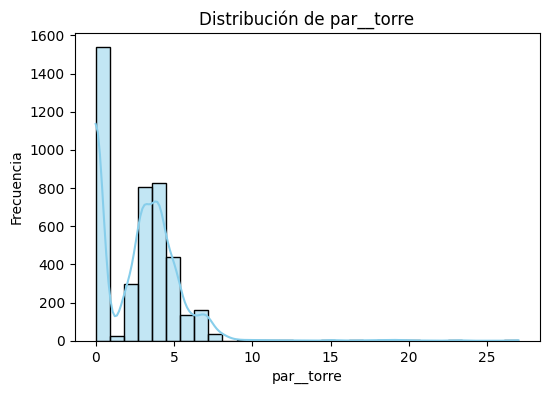

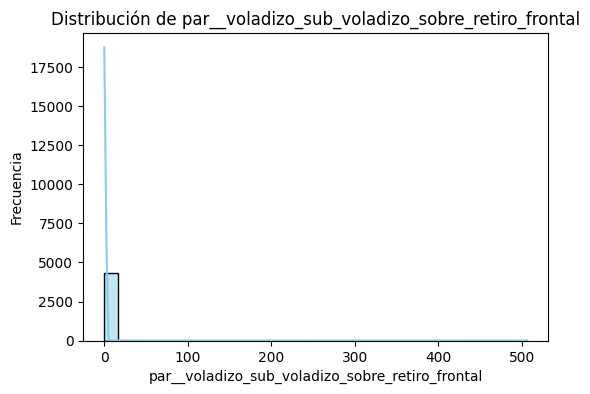

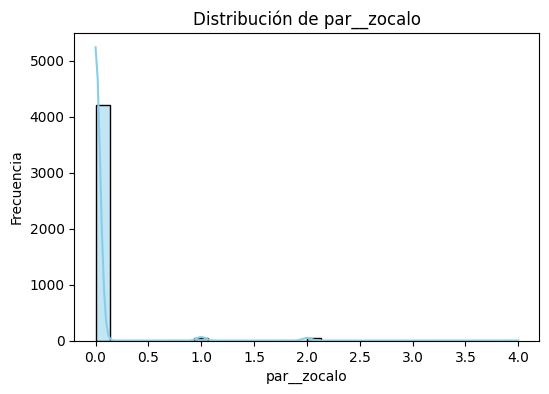

In [ ]:
# Separar columnas numéricas y categóricas
num_cols = df_modelo.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_modelo.select_dtypes(include=["object"]).columns

# --------- Graficar numéricas ---------
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_modelo[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# --------- Graficar categóricas ---------
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df_modelo[col].value_counts().head(20).plot(kind="bar", color="orange")
    plt.title(f"Top 20 categorías de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.show()


# Outlayers

📦 Columnas con outliers detectados:
['cantidad_pisos', 'superficie_legal', 'superficie_construida', 'par__ale_sub_area_de_lote_edificable', 'par__altillo', 'par__amc_sub_area_maxima_a_cubrir_sub_sotano', 'par__ame_sub_area_maxima_a_edificar_sub_zocalo', 'par__amf_sub_altura_maxima_de_fachada_sub_sotano', 'par__amv_sub_area_minima_verde', 'par__fml_sub_frente_minimo_de_lote', 'par__fondo', 'par__lateral_1', 'par__lateral_2', 'par__mezzanine', 'par__nmp_sub_numero_minimo_de_parqueos', 'par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal', 'par__rme_zocalo_sub_retiro_minimo_de_edificacion_zocalo_sub_frontal', 'par__semisotano', 'par__torre', 'par__voladizo_sub_voladizo_sobre_retiro_frontal', 'par__zocalo']


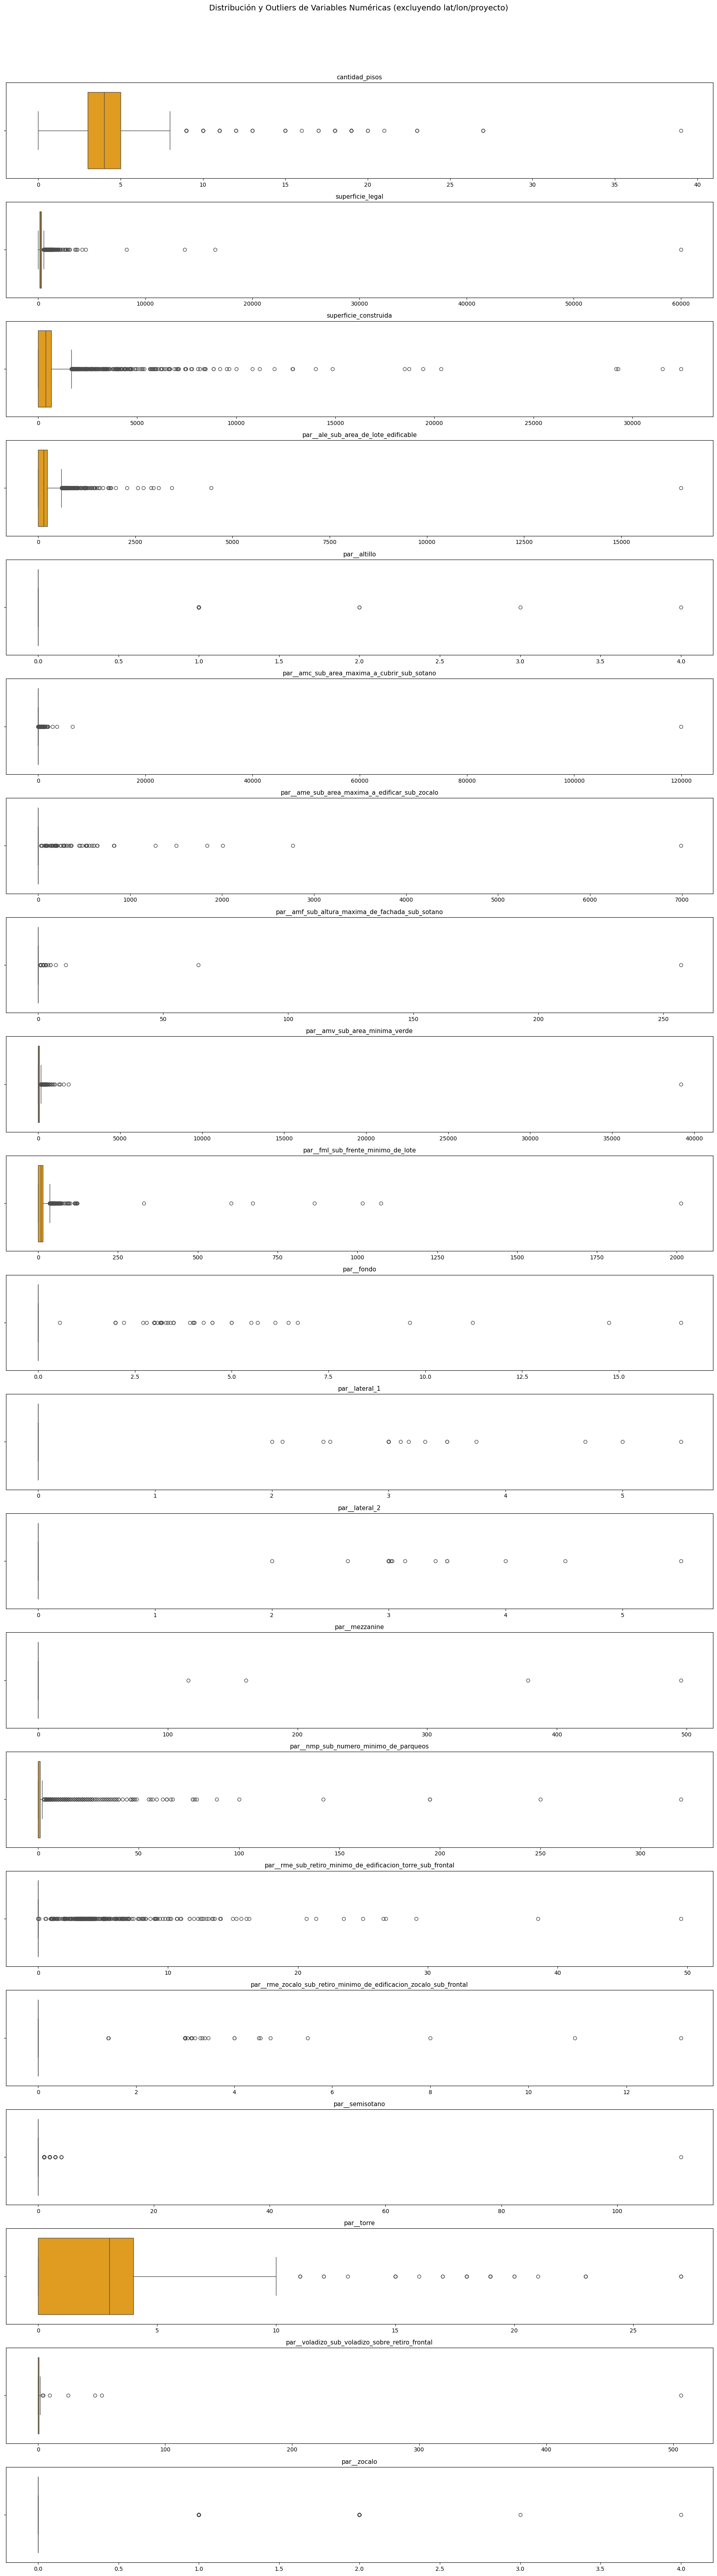

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Seleccionar solo columnas numéricas
num_cols = df_modelo.select_dtypes(include=["float64", "int64"]).columns

# Excluir columnas específicas
excluir = ["latitude", "longitude", "id_proyecto_desarrollo"]
num_cols = [c for c in num_cols if c not in excluir]

# Detectar columnas con outliers reales (z-score > 3)
outlier_cols = []
for col in num_cols:
    z = np.abs(stats.zscore(df_modelo[col]))
    if np.any(z > 3):
        outlier_cols.append(col)

print("📦 Columnas con outliers detectados:")
print(outlier_cols)

# Graficar solo las columnas con outliers
plt.figure(figsize=(18, len(outlier_cols) * 3))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(len(outlier_cols), 1, i)
    sns.boxplot(x=df_modelo[col], color="orange")
    plt.title(f"{col}", fontsize=11)
    plt.xlabel("")
plt.suptitle("Distribución y Outliers de Variables Numéricas (excluyendo lat/lon/proyecto)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
outliers_superficie = df_modelo[df_modelo["superficie_legal"] > 5000]
print(f"Filas con superficie_legal > 5000: {len(outliers_superficie)}")
outliers_superficie[["superficie_legal", "superficie_construida", "resultado", "macro_distrito","id_proyecto_desarrollo"]].sort_values(
    by="superficie_legal", ascending=False
).head(10)


Filas con superficie_legal > 5000: 4


superficie_legal  superficie_construida  resultado macro_distrito  \
2311          60000.00               29282.77   APROBADO   VII - CENTRO   
4029          16533.94               32443.74   APROBADO   I - COTAHUMA   
793           13687.12                   0.00  OBSERVADO        V - SUR   
4247           8257.59                   0.00  OBSERVADO        V - SUR   

      id_proyecto_desarrollo  
2311                      10  
4029                      12  
793                        4  
4247                      12

In [ ]:
# eliminamos outlayers
df_modelo = df_modelo[df_modelo["superficie_legal"] <= 5000]

In [ ]:
df_modelo.describe()

id_proyecto_desarrollo  cantidad_pisos  superficie_legal  \
count             4301.000000     4301.000000       4301.000000   
mean                 9.082074        3.968379        286.720846   
std                  1.759891        2.022990        275.804008   
min                  1.000000        0.000000          0.000000   
25%                  8.000000        3.000000        160.000000   
50%                  8.000000        4.000000        210.830000   
75%                  9.000000        5.000000        301.000000   
max                 12.000000       39.000000       4449.650000   

       superficie_construida     latitude    longitude  \
count            4301.000000  4301.000000  4301.000000   
mean              625.541753   -16.504803   -68.116193   
std              1378.693041     0.022419     0.031168   
min                 0.000000   -16.597460   -68.170706   
25%                 0.000000   -16.518921   -68.142539   
50%               374.750000   -16.501609   -68.120593   
75%               669.060000   -16.489458   -68.097262   
max             31517.000000   -16.440893   -68.031340   

       par__ale_sub_area_de_lote_edificable  par__altillo  \
count                           4301.000000   4301.000000   
mean                             175.066345      0.014648   
std                              249.291731      0.139831   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                              138.920000      0.000000   
75%                              240.000000      0.000000   
max                             4449.650000      4.000000   

       par__amc_sub_area_maxima_a_cubrir_sub_sotano  \
count                                   4301.000000   
mean                                      68.299735   
std                                     1835.423829   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                   119916.000000   

       par__ame_sub_area_maxima_a_edificar_sub_zocalo  ...  par__lateral_1  \
count                                     4301.000000  ...     4301.000000   
mean                                         7.460639  ...        0.014541   
std                                        131.602932  ...        0.226188   
min                                          0.000000  ...        0.000000   
25%                                          0.000000  ...        0.000000   
50%                                          0.000000  ...        0.000000   
75%                                          0.000000  ...        0.000000   
max                                       6987.850000  ...        5.500000   

       par__lateral_2  par__mezzanine  par__nmp_sub_numero_minimo_de_parqueos  \
count     4301.000000     4301.000000                             4301.000000   
mean         0.017961        0.267312                                1.968147   
std          0.244686        9.967901                                9.456321   
min          0.000000        0.000000                                0.000000   
25%          0.000000        0.000000                                0.000000   
50%          0.000000        0.000000                                0.000000   
75%          0.000000        0.000000                                1.000000   
max          5.500000      495.700000                              320.000000   

       par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal  \
count                                        4301.000000             
mean                                            0.946759             
std                                             2.278507             
min                                             0.000000             
25%                                             0.0

📦 Columnas con outliers detectados:
['cantidad_pisos', 'superficie_legal', 'superficie_construida', 'par__ale_sub_area_de_lote_edificable', 'par__altillo', 'par__amc_sub_area_maxima_a_cubrir_sub_sotano', 'par__ame_sub_area_maxima_a_edificar_sub_zocalo', 'par__amf_sub_altura_maxima_de_fachada_sub_sotano', 'par__amv_sub_area_minima_verde', 'par__fml_sub_frente_minimo_de_lote', 'par__fondo', 'par__lateral_1', 'par__lateral_2', 'par__mezzanine', 'par__nmp_sub_numero_minimo_de_parqueos', 'par__rme_sub_retiro_minimo_de_edificacion_torre_sub_frontal', 'par__rme_zocalo_sub_retiro_minimo_de_edificacion_zocalo_sub_frontal', 'par__semisotano', 'par__torre', 'par__voladizo_sub_voladizo_sobre_retiro_frontal', 'par__zocalo']


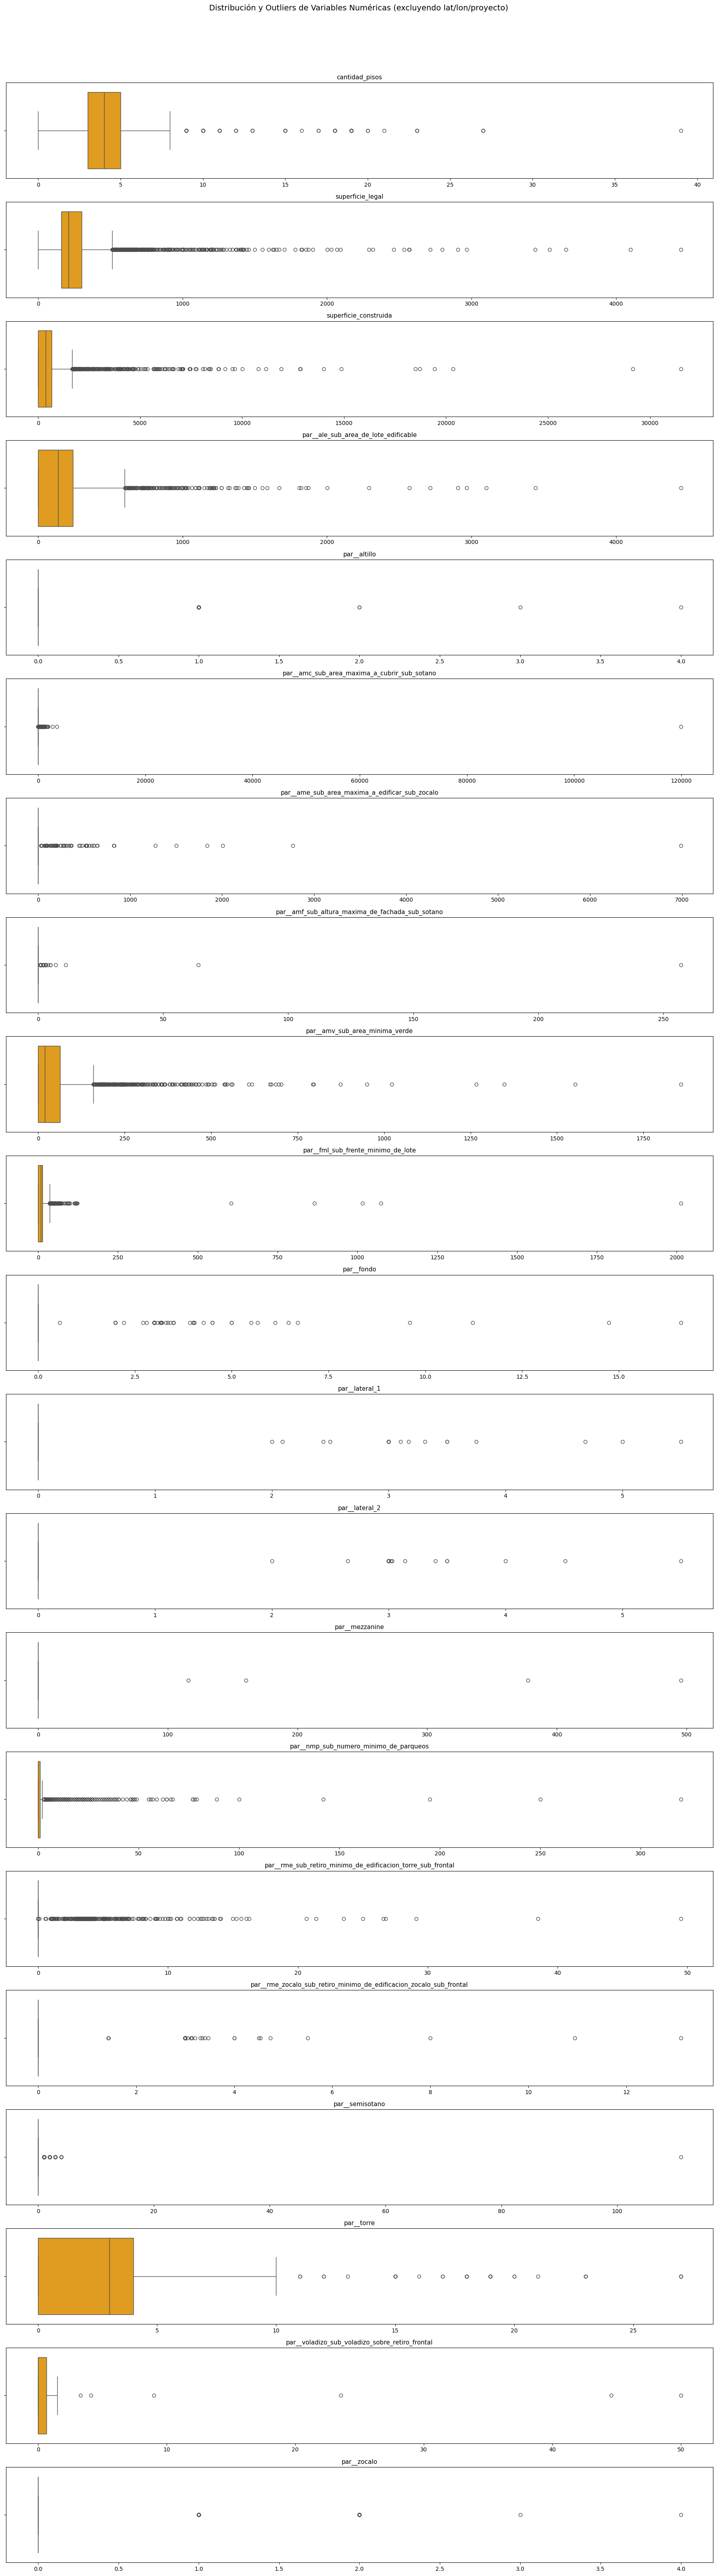

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Seleccionar solo columnas numéricas
num_cols = df_modelo.select_dtypes(include=["float64", "int64"]).columns

# Excluir columnas específicas
excluir = ["latitude", "longitude", "id_proyecto_desarrollo"]
num_cols = [c for c in num_cols if c not in excluir]

# Detectar columnas con outliers reales (z-score > 3)
outlier_cols = []
for col in num_cols:
    z = np.abs(stats.zscore(df_modelo[col]))
    if np.any(z > 3):
        outlier_cols.append(col)

print("📦 Columnas con outliers detectados:")
print(outlier_cols)

# Graficar solo las columnas con outliers
plt.figure(figsize=(18, len(outlier_cols) * 3))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(len(outlier_cols), 1, i)
    sns.boxplot(x=df_modelo[col], color="orange")
    plt.title(f"{col}", fontsize=11)
    plt.xlabel("")
plt.suptitle("Distribución y Outliers de Variables Numéricas (excluyendo lat/lon/proyecto)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
df_modelo.to_csv("df_modelo_limpio_1.csv",index=False)